In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import healpy as hp
%matplotlib inline

from pylab import cm

cmap = cm.jet
cmap.set_over(cmap(1.0))
cmap.set_under('w')
cmap.set_bad('gray')

import sys
import os

from urllib.request import urlretrieve,urlopen
from datetime import datetime

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('healpy version ' + hp.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
Numpy version 1.13.3
Pandas version 0.22.0
healpy version 1.11.0
Matplotlib version 2.1.2


In [2]:
df_gh_srz = pd.read_csv('df_tgas_hip_srez.csv',
                     #sep="\s+", 
                     #skiprows=1,
                     #usecols=[1,100],
                     #names=name_col
                    )

In [3]:
df_gh_srz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90283 entries, 0 to 90282
Data columns (total 69 columns):
Unnamed: 0                       90283 non-null int64
hip                              90283 non-null int64
tycho2_id                        0 non-null float64
solution_id                      90283 non-null int64
source_id                        90283 non-null int64
random_index                     90283 non-null int64
ref_epoch                        90283 non-null float64
ra                               90283 non-null float64
ra_error                         90283 non-null float64
dec                              90283 non-null float64
dec_error                        90283 non-null float64
parallax                         90283 non-null float64
parallax_error                   90283 non-null float64
pmra                             90283 non-null float64
pmra_error                       90283 non-null float64
pmdec                            90283 non-null float64
pmdec_err

In [4]:
[[df_gh_srz.ra.max(),df_gh_srz.ra.min()],
[df_gh_srz.l.max(),df_gh_srz.l.min()],
[df_gh_srz.ecl_lon.max(),df_gh_srz.ecl_lon.min()],
[df_gh_srz.dec.max(),df_gh_srz.dec.min()],
[df_gh_srz.b.max(),df_gh_srz.b.min()],
[df_gh_srz.ecl_lat.max(),df_gh_srz.ecl_lat.min()]]

[[179.99997189002639, -179.9952046997528],
 [179.99832093780174, -179.99995069177967],
 [179.99754803477452, -179.99969146506339],
 [89.569467052340485, -89.782381256822831],
 [89.894342605486912, -89.608066280847666],
 [89.482957764117202, -89.662232714280449]]

In [5]:
df_gh_srz['ra'] = df_gh_srz['ra'] + 180
df_gh_srz['dec'] = df_gh_srz['dec'] + 90

df_gh_srz['l'] = df_gh_srz['l'] + 180
df_gh_srz['b'] = df_gh_srz['b'] + 90

df_gh_srz['ecl_lon'] = df_gh_srz['ecl_lon'] + 180
df_gh_srz['ecl_lat'] = df_gh_srz['ecl_lat'] + 90

In [6]:
[[df_gh_srz.ra.max(),df_gh_srz.ra.min()],
[df_gh_srz.l.max(),df_gh_srz.l.min()],
[df_gh_srz.ecl_lon.max(),df_gh_srz.ecl_lon.min()],
[df_gh_srz.dec.max(),df_gh_srz.dec.min()],
[df_gh_srz.b.max(),df_gh_srz.b.min()],
[df_gh_srz.ecl_lat.max(),df_gh_srz.ecl_lat.min()]]

[[359.99997189002636, 0.0047953002471956552],
 [359.99832093780174, 4.9308220326338414e-05],
 [359.99754803477452, 0.0003085349366074297],
 [179.56946705234049, 0.21761874317716945],
 [179.89434260548691, 0.39193371915233399],
 [179.4829577641172, 0.33776728571955061]]

In [7]:
df_gh_srz[['hip','parallax','parallax_hip','parallax_difference','parallax_difference_abs','parallax_error','parallax_error_hip','nobs']].sort_values(
    by='parallax_difference_abs', ascending=False).head(75)

,hip,parallax,parallax_hip,parallax_difference,parallax_difference_abs,parallax_error,parallax_error_hip,nobs
16538,21000,3.613519,93.67,90.056481,90.056481,0.430925,7.62,41
32238,42525,5.939341,68.54,62.600659,62.600659,0.498971,15.51,88
89258,117081,7.767833,63.56,55.792167,55.792167,0.391416,21.02,52
69953,92059,1.025301,55.49,54.464699,54.464699,0.257513,13.48,74
12867,16582,3.352539,46.79,43.437461,43.437461,0.337983,47.48,78
37925,49971,10.032883,53.21,43.177117,43.177117,0.273956,17.78,79
10858,14101,148.510255,106.16,-42.350255,42.350255,0.941835,16.51,95
68772,90368,9.239326,51.00,41.760674,41.760674,0.238042,10.37,128
67064,87784,0.901640,41.30,40.398360,40.398360,0.261740,8.36,266
8599,11167,1.600522,40.32,38.719478,38.719478,0.361958,18.63,146


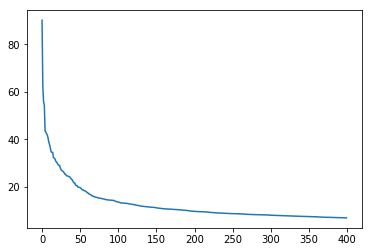

In [8]:
plt.plot([i for i in np.arange(len(df_gh_srz))][:400],df_gh_srz['parallax_difference_abs'].sort_values(ascending=False)[:400])

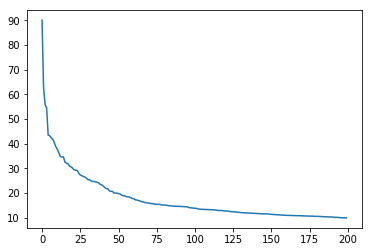

In [9]:
plt.plot([i for i in np.arange(len(df_gh_srz))][:200],df_gh_srz['parallax_difference_abs'].sort_values(ascending=False)[:200])

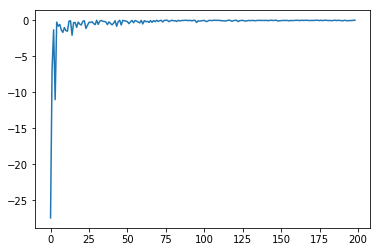

In [10]:
plt.plot([i for i in np.arange(len(df_gh_srz))][:200-1],np.diff(df_gh_srz['parallax_difference_abs'].sort_values(ascending=False)[:200]))

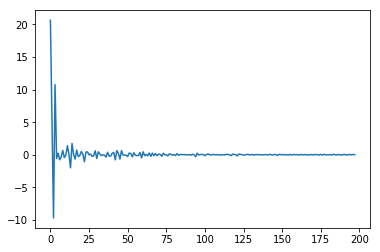

In [11]:
plt.plot([i for i in np.arange(len(df_gh_srz))][:200-2],np.diff(np.diff(df_gh_srz['parallax_difference_abs'].sort_values(ascending=False)[:200])))

19 19


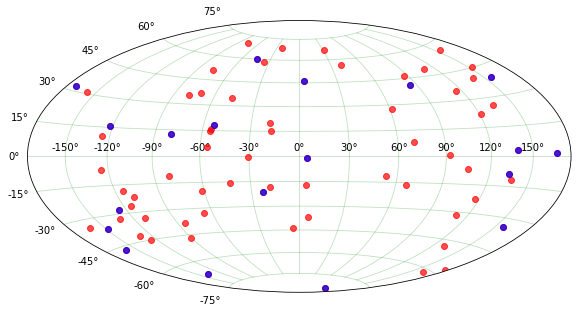

8 8


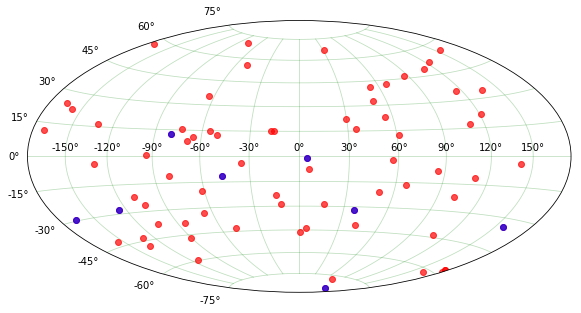

CPU times: user 536 ms, sys: 4 ms, total: 540 ms
Wall time: 542 ms


In [12]:
%%time

def scattermy(df0,x,y,c,k='ro'):
    import matplotlib as mpl
    plt.figure(figsize=(10,5))
    ax = plt.subplot(111, projection = 'hammer')
    ax.set_facecolor('w')
    plt.plot(
        (df0[x]-180)*np.pi/180,
        (df0[y]-90)*np.pi/180, 
        k, 
        alpha=.7
    )
    x1 = df0[df0[c]<0][x]
    y1 = df0[df0[c]<0][y]
    print(len(x1),len(y1))
    if (len(x1) and len(y1)):
        plt.plot(
            (x1-180)*np.pi/180,
            (y1-90)*np.pi/180, 
            'bo', 
            alpha=.7
        )
    

    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    
    plt.grid(color='g',alpha = .25)#, linestyle='--', linewidth=1.9)
    plt.show()

#scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'ra','dec','parallax_difference_abs')
#scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'ra','dec','parallax_difference')

#scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'l','b','parallax_difference_abs')
#scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'l','b','parallax_difference')

#scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'ecl_lon','ecl_lat','parallax_difference_abs')
scattermy(df_gh_srz[df_gh_srz['parallax_difference_abs']>3*df_gh_srz['parallax_error_hip_tgas']].sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'ecl_lon','ecl_lat','parallax_difference')
scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'ecl_lon','ecl_lat','parallax_difference')


In [13]:
FACT = lambda N: 1 if ( N <= 1) else N*FACT(N-1) 

#np.float64(3.1415926535897932384626433832795),np.float128(np.pi)


from decimal import *
getcontext().prec = 20
PI = Decimal('3.1415926535897932384626433832795')




def FACT2(N1,N2):
# ! Произведение чисел от N1 до N2 
# INTEGER(4), INTENT(IN) :: N1,N2
# INTEGER(4) ::  I
    
    fact2 = 1
    for i in np.arange(N1, N2+1):
        fact2 = fact2*i
    return fact2 

In [14]:
def A(M,N,K):
    Up = 1.
    for i in np.arange(0,2*M):
        Up = Up * (N - K - i)
    
    Dn = 1.
    for i in np.arange(1,M+1):
        Dn = Dn * 2 * i * (2 * (N - i) + 1)
    #tosha^.^
    if (M % 2 == 0):
        return Up/Dn
    else:
        return -Up/Dn
    

def NORM(N,K):
    Up = 1.
    for i in np.arange(N+1,2*N+1):
        Up = Up * i
    Dn = 1.
    for i in np.arange(1, N-K+1):
        Dn = Dn * i
    
    Up = Up / Dn
    
    for i in np.arange(1, N+1):
        Up = Up * 0.5
    return Up

    
def PL(N,K,D):
#Присоединенный полином Лежанжра P_nk
#N,K  - Индексы полинома
#D    - Склонение или галактическая широта в градусах!'''
    if (N<K): return .0 
    
    D = D
#    X = np.sin(D)
#заменили - для случа, когда у нас D изменяется от 0 до pi, на этот отрезке sin(D), эевивалентно -cos(D)
    X = - np.cos(D)
    F = (N - K) / 2
    
    if (F == 0):
        Z = X **(N-K) * np.sqrt(1-X**2) ** K
    else:
        Z = X ** (N-K)
        for m in np.arange(1,F+1):
            Z = Z + A(m,N,K) * X**(N - K - 2*m)
        Z = Z * np.sqrt(1 - X ** 2) ** K
    return NORM(N,K)*Z


def INDEXJ(N,K,L):
    #Вычисление индекса J=N**2+2*K+L-1
    return N ** 2 + 2 * K + L-1

def INDEXES(J):
#Вычисление индексов N,K,L по индексу J (J=N**2+2*K+L-1)
    N = int(np.sqrt(J))
    K = J - N ** 2
    if (K % 2 == 0):
        L = 1
    else:
        L = 0
    K = (K - L + 1) / 2
    return N,int(K),int(L)

def FK(N,K,L,A,D):
#Ненормированная сферическая функция
    if (K == 0):
        return PL(N, 0, D)
    else:
        if (L == 0):
            return PL(N, K, D) * np.sin(K * A)
        else:
            return PL(N, K, D) * np.cos(K * A)
        
        
def FR(N,K):
#! Норма сферической функции
    fr = np.sqrt((2*N+1)/(4.*np.float64(PI)))
    if (K > 0):
        fr=fr*np.sqrt(2.0/FACT2(N-K+1,N+K))
    return fr
    
    
    
    
def FV(N,K,L,A,D):
# ! Нормированная сферическая функция
#INTEGER, INTENT (IN) :: N,K,L
#REAL(8), INTENT (IN) :: A,D ! В градусах
    return FR(N,K) * FK(N,K,L,A,D)

def FVJ(J,A,D):
# ! Нормированная сферическая функция от одного индекса
# INTEGER, INTENT (IN) :: J
# REAL(8), INTENT (IN) :: A,D ! В градусах
#широта (0 -180) b theta, dec, lat
#долгота (0 - 360) l phi, ra, lon
    N,K,L = INDEXES(J)
    return FV(N,K,L,A,D)

In [32]:
NSIDE = 10
sfet_f_n = 49
nside_a_n = NSIDE**2 * 12


n_array_nside = np.arange(hp.nside2npix(NSIDE))

############################################################
##########           vizualization sf
############################################################

def madj(Z):
    M = sum(Z)/len(Z)
    M
    d0 = .0
    for i in Z:
        d0 += np.power((i - M),2)
    return np.sqrt(d0/len(Z)),M

#madj(X0[0]),madj(X1[0]),madj(X2[0][1:])
#X0[1]/nside_a_n,X1[1]/nside_a_n,X2[1]/nside_a_n,


def mapp(Zmap):
    kmapp_0 = np.zeros(nside_a_n)
    for i in [n_array_nside]:
        lib, lil  = list(hp.pix2ang(NSIDE, i))
        for j in np.arange(sfet_f_n):
            kmapp_0[i] += Zmap[j] * FVJ(j, lil,lib)
    return kmapp_0


def mappj(j):
    nsidesub = 32
    nside_a_n_sub = nsidesub**2*12
    kmapp_0 = np.zeros(nside_a_n_sub)
    for i in np.arange(nside_a_n_sub):
        lib, lil  = list(hp.pix2ang(nsidesub, i))
        kmapp_0[i] = FVJ(j, lil,lib)
    return kmapp_0

def mappj_val0(j):
    lib, lil  = list(hp.pix2ang(NSIDE, int(nside_a_n/2)))
    return FVJ(j, lil,lib)

def print_sf(n):
    for j_sf in np.arange(0,n):
        indexsej0,indexsej1,indexsej2 = INDEXES(j_sf)
        titles =  'j='+str(j_sf) + ' (n={}, k={}, l={})'.format(indexsej0,indexsej1,indexsej2)
        mapppj = mappj(j_sf)

        hp.mollview(mapppj,title =titles,unit='',xsize = 800,cmap='seismic')
        
        
#######################################################################
##########              end vizualization sf
#######################################################################

ii = lambda b,l: hp.ang2pix(NSIDE,b/180*np.pi,l/180*np.pi)

def get_Y(df_gh_srz,arg_l = 'l', arg_b = 'b', arg_summ = ''):
    Ny_ = np.zeros(nside_a_n)
    Y_ = np.zeros(nside_a_n)
    for i in ii(df_gh_srz[arg_b],df_gh_srz[arg_l]):
        Ny_[i] += 1
    print('min_ns={}\tmax_ns={}\t'.format(min(Ny_),max(Ny_)),end='') #nmin_n_in_sector max_n_in_sector
    for i,rm in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_summ]):
        Y_[i] += rm
    Y__ = [Y_[i] / Ny_[i] if (Ny_[i] > 0) else .0 for i in np.arange(nside_a_n)]
    return Y__ / max(Y__)

def get_a(df_gh_srz,arg_l0,arg_b0,cintro_m=False,arg_m = '',arg_y = ''):
    
    def get_lb(df_gh_srz,arg_l = 'l', arg_b = 'b',arg_m=''):
        Nl_ = [[] for i in np.arange(nside_a_n)]
        ll_ = [[] for i in np.arange(nside_a_n)]
        bb_ = [[] for i in np.arange(nside_a_n)]
        mm_ = [[] for i in np.arange(nside_a_n)]
        kl12 = [0 for i in np.arange(nside_a_n)]
        lb12 = [0 for i in np.arange(nside_a_n)]
        
        
        if (arg_m == ''):
            arg_m = arg_l
        for i,m_ in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_m]):
            if (arg_m == arg_l):
                m_ = 1
            Nl_[i].append(np.abs(m_))
        for i,rm1,rm2,m_ in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_l],df_gh_srz[arg_b],df_gh_srz[arg_m]):
            if (arg_m == arg_l):
                m_ = 1
            ll_[i].append(rm1)
            bb_[i].append(rm2)
            mm_[i].append(m_)
            
        for i in np.arange(nside_a_n):
            if len(ll_[i])>1 and max(ll_[i]) - min (ll_[i]) > 181:
                ll_[i] = [j if (j<180) else j-360 for j in ll_[i]]
                #print(i,max(ll_[i]),min(ll_[i]), end=' ')
                #klsum_ = np.dot(ll_[i],mm_[i])
                #kl12_ = (klsum_/sum(Nl_[i])/180)*np.pi
                #if (kl12_ < 0):
                #    kl12_ += 2*np.pi
                #print(kl12_*180/np.pi if (kl12_*180/np.pi < 360) else (kl12_*180/np.pi,'FFFFFFFFF'))
        
        for i in np.arange(nside_a_n):
            klsum = np.dot(ll_[i],mm_[i])
            kl12[i] = (klsum/sum(Nl_[i])/180)*np.pi
            if (kl12[i] < 0):
                kl12[i] += 2*np.pi
                
            lbsum = np.dot(bb_[i],mm_[i])
            lb12[i] = (lbsum/sum(Nl_[i])/180)*np.pi
            #print(i,kl12[i],lb12[i])
            
        return kl12, lb12
                
        
    '''     
        Nl_ = np.zeros(nside_a_n)
        ll_ = np.zeros(nside_a_n)
        bb_ = np.zeros(nside_a_n)

        if (arg_m != ''):
            #print('|arg_m != ""',end='')
            for i,m_ in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_m]):
                Nl_[i] += np.abs(m_)
            for i,rm1,rm2,m_ in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_l],df_gh_srz[arg_b],df_gh_srz[arg_m]):
                ll_[i] += rm1*m_
                bb_[i] += rm2*m_
        else:
            for i in ii(df_gh_srz[arg_b],df_gh_srz[arg_l]):
                Nl_[i] += 1
            for i,rm1,rm2 in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_l],df_gh_srz[arg_b]):
                ll_[i] += rm1
                bb_[i] += rm2
        
        #for i,j,kl,kb,kn,ij in zip(ll_ / Nl_,bb_ / Nl_,ll_ ,bb_ , Nl_,[i for i in np.arange(len(Nl_))]):
            #if (np.abs(i) > 180 or np.abs(j) > 180):
                #print('\nlb:',ij,i,j,kl,kb,kn)
        return (ll_ / Nl_ /180)*np.pi, (bb_ / Nl_/180)*np.pi'''
    
   

    
    get_dif_l = lambda x,y: min((x-y)%(2*np.pi),-(x-y)%(2*np.pi))
    get_dif_b = lambda x,y: min((x-y)%np.pi,-(x-y)%np.pi)
    
    Am = np.zeros((nside_a_n, sfet_f_n))
    
    if (cintro_m == True):
        print("|cintro_m= True",end='')
        arg_l,arg_b = get_lb(df_gh_srz,arg_l0,arg_b0,arg_m)
        maxl,maxb=.0,.0
        for i in n_array_nside:
            get_b, get_l  = list(hp.pix2ang(NSIDE, i))
            #print(i, get_l,get_b)
            if ((get_dif_b(get_b,arg_b[i]) > maxb) or (get_dif_l(get_l,arg_l[i]) > maxl)):
                #print(arg_l[i],arg_b[i],round(get_dif_l(get_l,arg_l[i]),2),round(get_dif_b(get_b,arg_b[i]),2))
                maxb,maxl=max(get_dif_b(get_b,arg_b[i]),maxb),max(get_dif_l(get_l, arg_l[i]),maxl)
                print('\r({},{})\tmax_dl={}\tmax_db={}\t'.format(arg_l0[-3:],arg_b0[-3:],round(maxl*180/np.pi,2),round(maxb*180/np.pi,2)),end='')
                #print(get_l,arg_l[i],maxl, get_b,arg_b[i], maxb)
            for j in np.arange(sfet_f_n):
                Am[i][j] = FVJ(j, arg_l[i],arg_b[i])
    else:
        for i in n_array_nside:
            get_b, get_l  = list(hp.pix2ang(NSIDE, i))
            for j in np.arange(sfet_f_n):
                Am[i][j] = FVJ(j, get_l,get_b)
    #print('\t| Am creat.', end='')
    
    Y = get_Y(df_gh_srz,arg_l0, arg_b0, arg_y)
    #print('| Y creat.', end='')
    print()
    return Am, Y

MMM = lambda x: sum(x)/len(x)
DDD = lambda x: np.sqrt(sum([np.power(i-MMM(x),2) for i in x])/len(x))

def statis(Zx):
    print('d={},\tM={},\tD={}'.format(Zx[1][0]/nside_a_n,MMM(Zx[0]),DDD(Zx[0])))
    ink = []
    for k in np.arange(len(Zx[0])):
        if (np.abs(Zx[0][k]- MMM(Zx[0])) - DDD(Zx[0]) > 0):
            ink.append(k)
            print('j =',k,round(Zx[0][k],4),sep='\t')
    return Zx[1][0]/nside_a_n,MMM(Zx[0]),DDD(Zx[0]),ink

def get_healpix_sf(X_,Y_,k_):
    ert = np.zeros(sfet_f_n)
    for i in k_:
        ert[i]=X_[0][i]

    #hp.mollview(mapp(X_[0]),title = 'sf',unit='opromin op',xsize = 1200,cmap='jet')
    hp.mollview(np.array(Y_),title = '',unit='',xsize = 800,cmap='jet')
    hp.mollview(mapp(ert),title = ''.format(k_),unit='',xsize = 800,cmap='jet')
    #hp.mollview(np.array(Y2)-mapp(X2[0]),title = 'Y- sf',unit='opromin op',xsize = 1200, cmap='jet')
    from scipy.stats import linregress
    
    
    b = np.array(get_Y(df_gh_srz,'ecl_lon', 'ecl_lat','parallax_difference_abs'))
    print('parallax_difference_abs',linregress(mapp(ert),b))
    b = np.array(get_Y(df_gh_srz,'ecl_lon', 'ecl_lat','parallax_error_hip_tgas'))
    print('parallax_error_hip_tgas',linregress(mapp(ert),b))
    b = np.array(get_Y(df_gh_srz,'ecl_lon', 'ecl_lat','nobs'))
    print('nobs',linregress(mapp(ert),b))
    
    
    plt.figure(figsize=(10,6))
    xx = [ i for i in np.arange(sfet_f_n)]
    markerline, stemlines, baseline = plt.stem(xx, X_[0], '--')
    plt.setp(baseline, 'color', 'k', 'linewidth', 2)
    
    #plt.plot(xx,[MMM(X_[0]) for i in xx],'--',color='r')
    #plt.plot(xx,[MMM(X_[0])+DDD(X_[0]) for i in xx],':',color='r')
    #plt.plot(xx,[MMM(X_[0])-DDD(X_[0]) for i in xx],':',color='r')
    plt.grid()
    plt.show()

    
def get_sf_gr(df_gh_srz,cintro_m0=True,arg_m0='parallax_difference_abs',arg_y0 = 'parallax_difference_abs' ):
    print('\ncintro_m="{}", arg_m="{}", arg_y="{}"'.format(cintro_m0,arg_m0,arg_y0))
    print('(ra,dec): ', end='')
    Am0 ,Y0= get_a(df_gh_srz,'ra','dec',cintro_m0,arg_m0,arg_y0)
    X0 = np.linalg.lstsq(Am0,Y0)
    
    X00 = list(X0)
    X00[0] = list(X0[0]/np.sum(np.abs(X0[0])))
    xk0 = np.sum(np.abs(X0[0]))
    
    #print('\tget_sf_gr: done')
    
    print('(l,b):    ', end='')
    Am1 ,Y1= get_a(df_gh_srz,'l','b',cintro_m0,arg_m0,arg_y0)
    X1 = np.linalg.lstsq(Am1,Y1)
    #print('\tget_sf_gr: done')
    
    X10 = list(X1)
    X10[0] = list(X1[0]/np.sum(np.abs(X1[0])))
    xk1 = np.sum(np.abs(X1[0]))
    
    print('(lon,lat):', end='')
    Am2 ,Y2= get_a(df_gh_srz,'ecl_lon','ecl_lat',cintro_m0,arg_m0,arg_y0)
    X2 = np.linalg.lstsq(Am2,Y2)
    #print('\tget_sf_gr: done')
        
    X20 = list(X2)
    X20[0] = list(X2[0]/np.sum(np.abs(X2[0])))
    xk2 = np.sum(np.abs(X2[0]))
    
    d0,M0,D0,k0 = statis(X00)
    d1,M1,D1,k1 = statis(X10)
    d2,M2,D2,k2 = statis(X20)
    
    plt.figure(figsize=(20,9))
    colors = ['blue','green','red']
    labels = ['ra,dec','l,b','lon,lat']
    xx = [ i for i in np.arange(sfet_f_n)]
    plt.hist([xx,xx,xx], sfet_f_n, weights = [X00[0],X10[0],X20[0]],histtype='bar', color=colors, label=labels)
    #import matplotlib.lines as pltln
    #pltln.Line2D([0,sfet_f_n],[M0,M0+1],lw=5,ls='--',color=colors[0])
    plt.plot(xx,[M0 for i in xx],'-',color=colors[0])
    plt.plot(xx,[M1 for i in xx],'-',color=colors[1])
    plt.plot(xx,[M2 for i in xx],'-',color=colors[2])
    plt.plot(xx,[M0+D1 for i in xx],'-.',color=colors[0])
    plt.plot(xx,[M1+D1 for i in xx],'-.',color=colors[1])
    plt.plot(xx,[M2+D2 for i in xx],'-.',color=colors[2])
    plt.plot(xx,[M0-D0 for i in xx],'-.',color=colors[0])
    plt.plot(xx,[M1-D1 for i in xx],'-.',color=colors[1])
    plt.plot(xx,[M2-D2 for i in xx],'-.',color=colors[2])
    plt.legend(prop={'size': 10})
    plt.grid()
    
    if (len(k0)>1):
        print('get_healpix:k={}, (ra,dec)'.format(len(k0)))
        get_healpix_sf(X00,Y0,k0)
    if (len(k1)>1):
        print('get_healpix:k={}, (l,b)'.format(len(k1)))
        get_healpix_sf(X10,Y1,k1)
    if (len(k2)>1):
        print('get_healpix:k={}, (ecl_lon,ecl_lat)'.format(len(k2)))
        get_healpix_sf(X20,Y2,k2)
    
    def vizual_data(P):
        P0,P1,P2 = P
        d0,M0,D0,k0,X0 = P0[0],P0[1],P0[2],P0[3],P0[4]
        d1,M1,D1,k1,X1 = P1[0],P1[1],P1[2],P1[3],P1[4]
        d2,M2,D2,k2,X2 = P2[0],P2[1],P2[2],P2[3],P2[4]
        print('#'*80)
        print('d:\t{}\t{}\t{}'.format(round(d0,4),round(d1,4),round(d2,4)))
        print('M:\t{}\t{}\t{}'.format(round(M0,4),round(M1,4),round(M2,4)))
        print('k:\t{}\t{}\t{}'.format(k0, k1, k2))
        print('#'*80)
        print('id__\tra,dec\t__l,b__\tlon,lat\ts_rd\ts_lb\ts_ll\t')
        print('='*80)
        for i in np.arange(len(X0)):
            print('{} &{} &{} &{} &{} &{} &{}\\\\'.format(i,round(X0[i],4),round(X1[i],4),round(X2[i],4),round(D0,4),round(D1,4),round(D2,4)))
        print('#'*80)
        
    vizual_data([[d0,M0,D0,k0,X00[0]],[d1,M1,D1,k1,X10[0]],[d2,M2,D2,k2,X20[0]]])
    return [[d0,M0,D0,k0,X00[0],xk0],[d1,M1,D1,k1,X10[0],xk1],[d2,M2,D2,k2,X20[0],xk2]]


cintro_m="True", arg_m="parallax_difference_abs", arg_y="parallax_difference_abs"
(ra,dec)	max_dl=4.93	max_db=1.43	min_ns=31.0	max_ns=170.0	
(l,b)	max_dl=6.16	max_db=1.52	min_ns=31.0	max_ns=174.0	
(lon,lat)	max_dl=8.58	max_db=1.2	min_ns=35.0	max_ns=169.0	
d=0.004636463987347918,	M=0.010693698921562812,	D=0.08990868403202058
j =	0	0.6257
d=0.004720492401935945,	M=0.014997942338425213,	D=0.09029925226663078
j =	0	0.6326
d=0.005536135045007029,	M=0.011139588097339623,	D=0.09309133276227773
j =	0	0.6478
j =	4	-0.0931
get_healpix:k=2, (ecl_lon,ecl_lat)
min_ns=35.0	max_ns=169.0	parallax_difference_abs LinregressResult(slope=2.5507287807004326, intercept=0.00070782950338166284, rvalue=0.63126147004083422, pvalue=2.1275710016333039e-134, stderr=0.090541490642343514)
min_ns=35.0	max_ns=169.0	parallax_error_hip_tgas LinregressResult(slope=3.0492291897837269, intercept=0.0054308647323541015, rvalue=0.7238694641592216, pvalue=2.4905845869416854e-195, stderr=0.083967419989365993)
min_ns=35.0	max_n

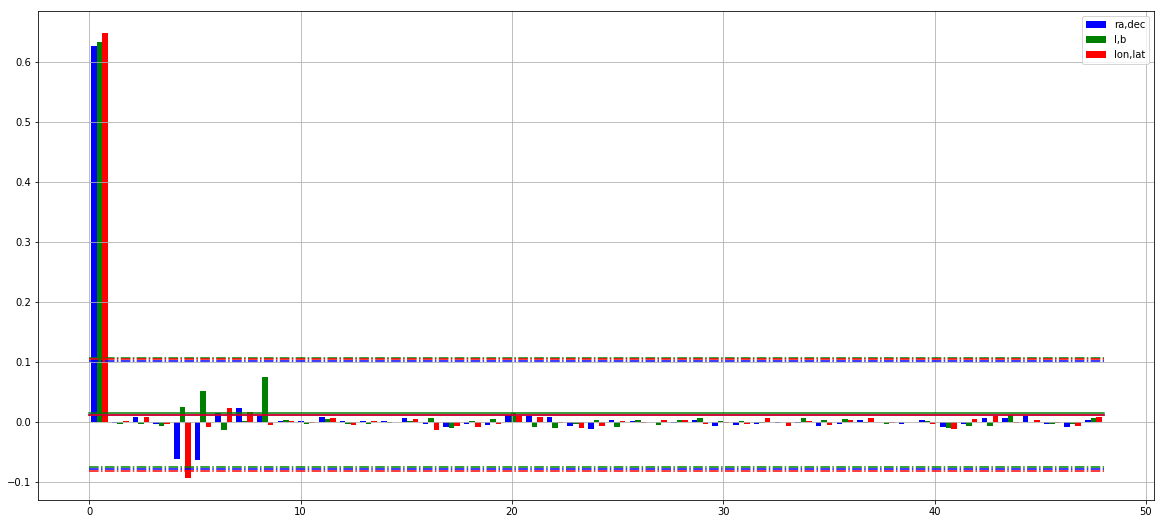

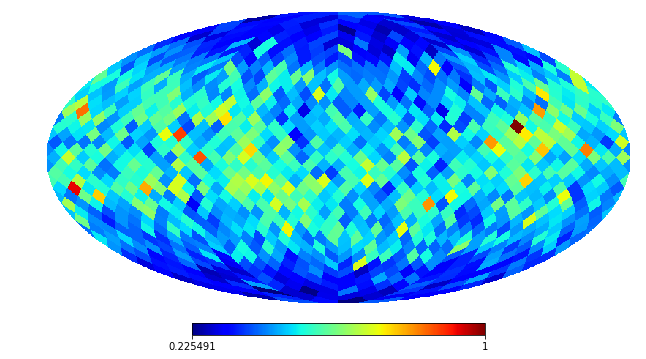

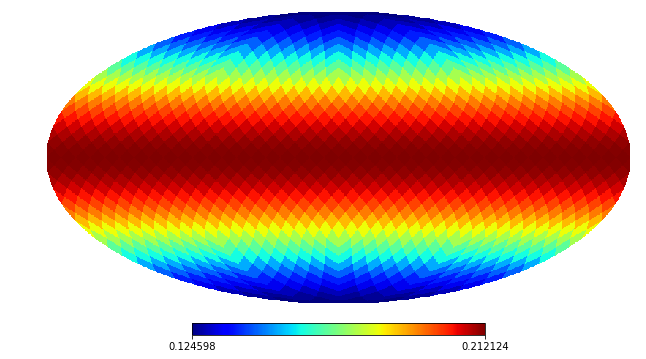

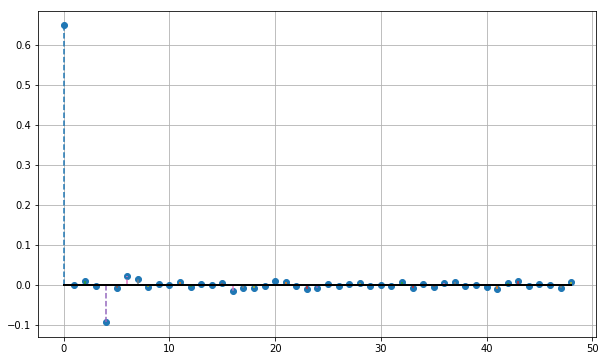

################################################################################
d:	0.0046	0.0047	0.0055
M:	0.0107	0.015	0.0111
k:	[0]	[0]	[0, 4]
################################################################################
id__	ra,dec	__l,b__	lon,lat	s_rd	s_lb	s_ll	
0 &0.6257 &0.6326 &0.6478 &0.0899 &0.0903 &0.0931\\
1 &-0.0027 &-0.0036 &0.0004 &0.0899 &0.0903 &0.0931\\
2 &0.0072 &-0.0038 &0.0081 &0.0899 &0.0903 &0.0931\\
3 &-0.004 &-0.0076 &-0.0043 &0.0899 &0.0903 &0.0931\\
4 &-0.062 &0.0243 &-0.0931 &0.0899 &0.0903 &0.0931\\
5 &-0.0645 &0.0518 &-0.0082 &0.0899 &0.0903 &0.0931\\
6 &0.0149 &-0.0144 &0.0229 &0.0899 &0.0903 &0.0931\\
7 &0.0223 &0.0016 &0.0154 &0.0899 &0.0903 &0.0931\\
8 &0.0097 &0.0739 &-0.0059 &0.0899 &0.0903 &0.0931\\
9 &0.0008 &0.0031 &0.0012 &0.0899 &0.0903 &0.0931\\
10 &0.0003 &-0.0039 &-0.0014 &0.0899 &0.0903 &0.0931\\
11 &0.0072 &0.0036 &0.0063 &0.0899 &0.0903 &0.0931\\
12 &0.0019 &-0.0045 &-0.0049 &0.0899 &0.0903 &0.0931\\
13 &0.001 &-0.0039 &0.0013 &0.0899 &

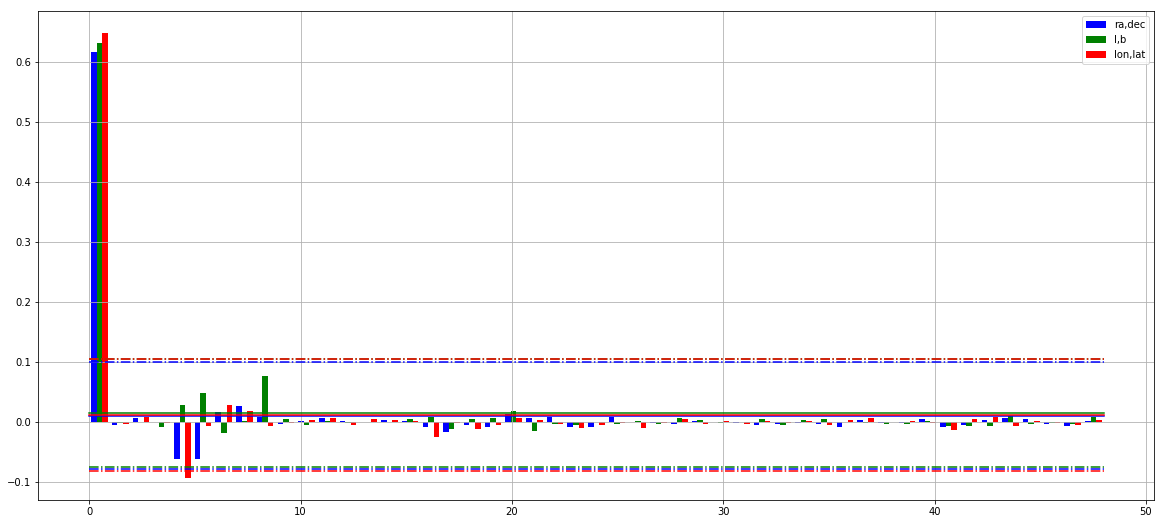

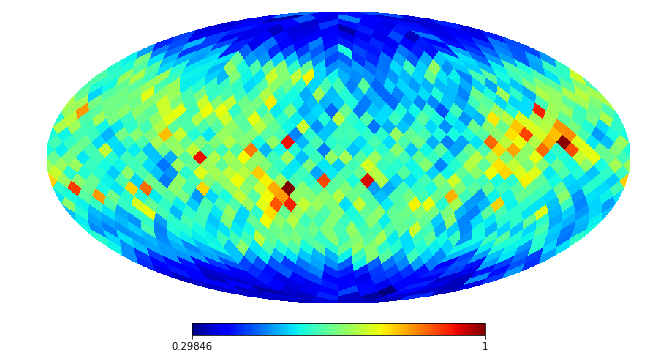

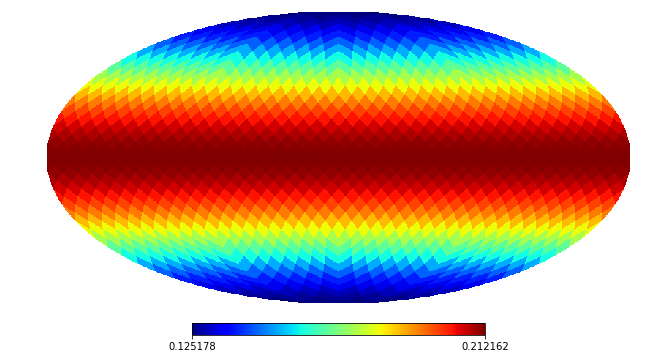

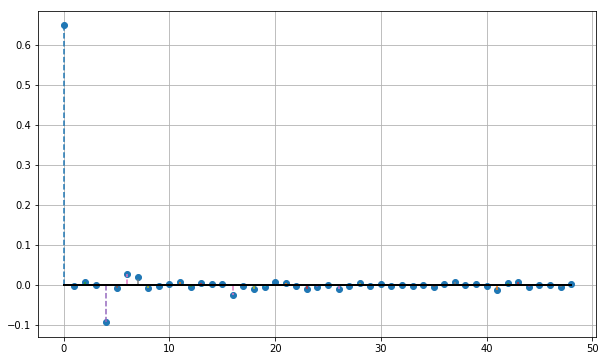

################################################################################
d:	0.0038	0.0032	0.0036
M:	0.0106	0.0155	0.0111
k:	[0]	[0]	[0, 4]
################################################################################
id__	ra,dec	__l,b__	lon,lat	s_rd	s_lb	s_ll	
0 &0.6162 &0.6311 &0.6486 &0.0886 &0.09 &0.0933\\
1 &-0.0054 &-0.0019 &-0.0026 &0.0886 &0.09 &0.0933\\
2 &0.0061 &0.0009 &0.0083 &0.0886 &0.09 &0.0933\\
3 &-0.0008 &-0.0086 &-0.0008 &0.0886 &0.09 &0.0933\\
4 &-0.0617 &0.0277 &-0.0925 &0.0886 &0.09 &0.0933\\
5 &-0.0624 &0.0489 &-0.0071 &0.0886 &0.09 &0.0933\\
6 &0.0173 &-0.0178 &0.0277 &0.0886 &0.09 &0.0933\\
7 &0.0268 &0.0017 &0.0188 &0.0886 &0.09 &0.0933\\
8 &0.0086 &0.0759 &-0.0066 &0.0886 &0.09 &0.0933\\
9 &-0.004 &0.0053 &-0.0014 &0.0886 &0.09 &0.0933\\
10 &0.0015 &-0.0055 &0.0028 &0.0886 &0.09 &0.0933\\
11 &0.0072 &0.0012 &0.0063 &0.0886 &0.09 &0.0933\\
12 &0.0016 &-0.0016 &-0.0046 &0.0886 &0.09 &0.0933\\
13 &0.0006 &-0.0006 &0.0044 &0.0886 &0.09 &0.0933\\
14 &0.0

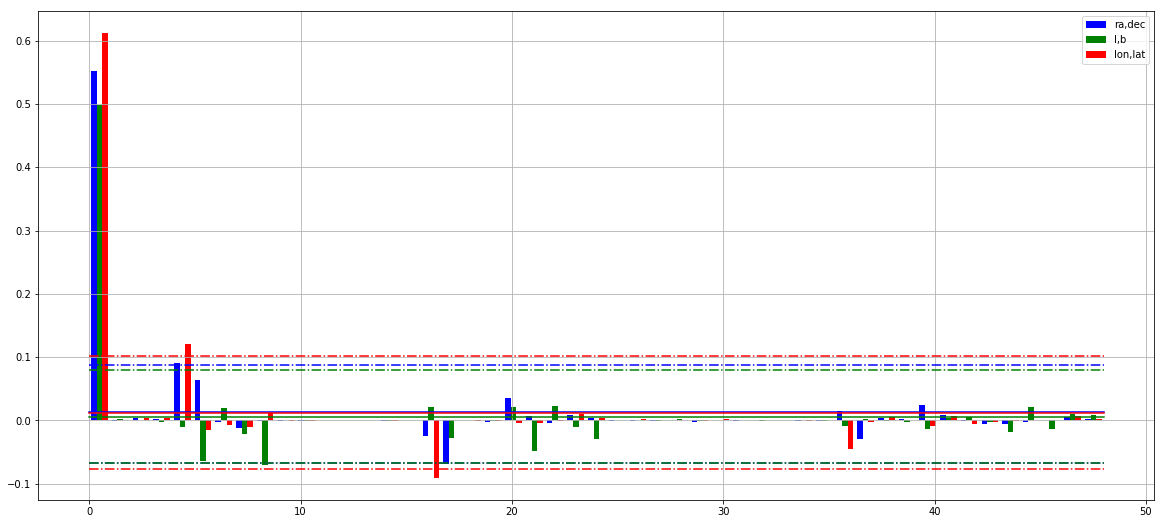

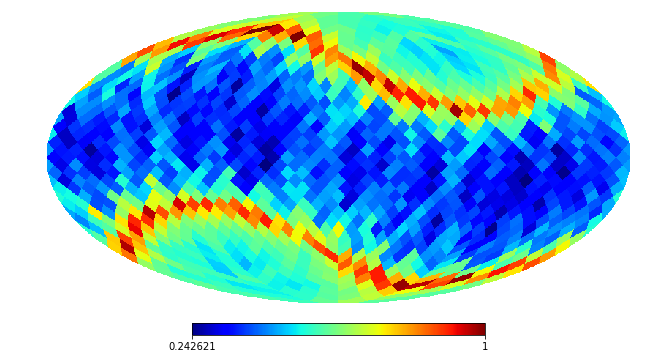

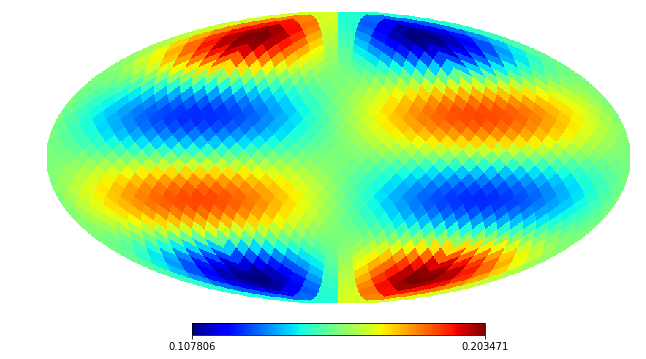

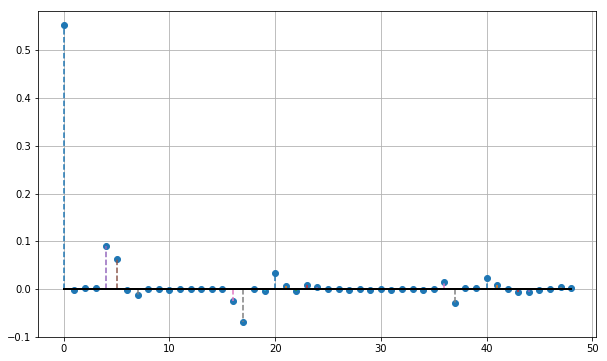

get_healpix:k=2, (l,b)
min_ns=35.0	max_ns=169.0	parallax_difference_abs LinregressResult(slope=0.21705437096128485, intercept=0.43643852369665764, rvalue=0.040361616007981535, pvalue=0.16232949513626085, stderr=0.15524497303725754)
min_ns=35.0	max_ns=169.0	parallax_error_hip_tgas LinregressResult(slope=0.28982837546321288, intercept=0.52205414108813286, rvalue=0.051697090424937413, pvalue=0.073426504957886454, stderr=0.16175781432721173)
min_ns=35.0	max_ns=169.0	nobs LinregressResult(slope=-0.47082975770158586, intercept=0.55689601292606861, rvalue=-0.061473856698822674, pvalue=0.033228488710263022, stderr=0.22086295206877343)


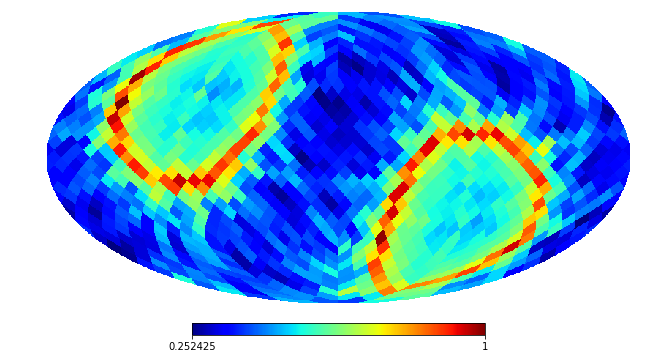

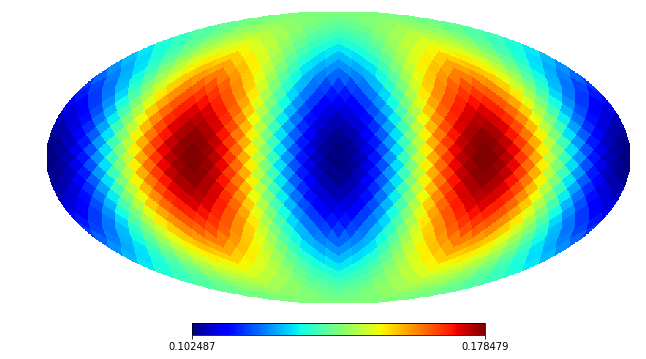

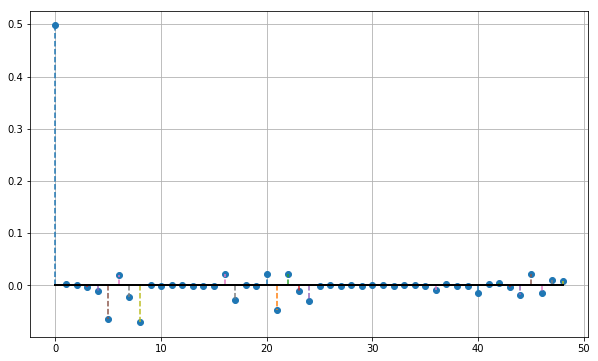

get_healpix:k=3, (ecl_lon,ecl_lat)
min_ns=35.0	max_ns=169.0	parallax_difference_abs LinregressResult(slope=-1.113267420649525, intercept=0.65933998604623101, rvalue=-0.44732012091612733, pvalue=4.2705282623308246e-60, stderr=0.064309004087062346)
min_ns=35.0	max_ns=169.0	parallax_error_hip_tgas LinregressResult(slope=-1.2108254689109801, intercept=0.77204032626463015, rvalue=-0.46668696365326989, pvalue=6.1768131873562841e-66, stderr=0.066295993720480687)
min_ns=35.0	max_ns=169.0	nobs LinregressResult(slope=2.8457968146845412, intercept=-0.001094321762351691, rvalue=0.80287765130791999, pvalue=2.1298175562963679e-271, stderr=0.061048805506131704)


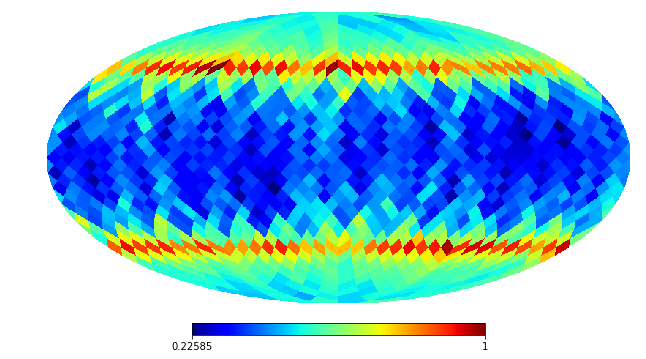

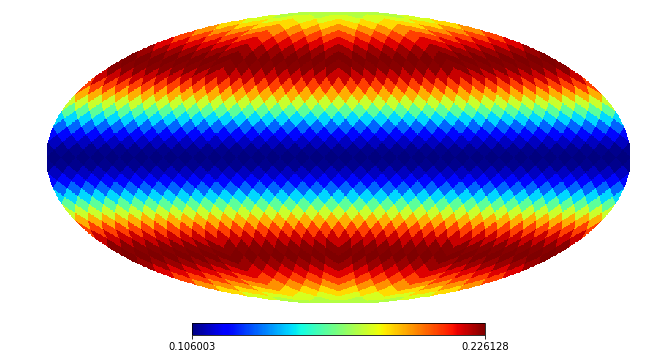

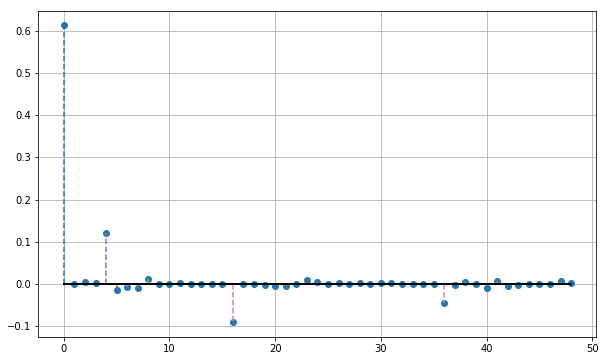

################################################################################
d:	0.0066	0.0065	0.0062
M:	0.0136	0.006	0.0121
k:	[0, 17]	[0, 8]	[0, 4, 16]
################################################################################
id__	ra,dec	__l,b__	lon,lat	s_rd	s_lb	s_ll	
0 &0.5517 &0.498 &0.6126 &0.0803 &0.0733 &0.0897\\
1 &-0.0015 &0.002 &0.0001 &0.0803 &0.0733 &0.0897\\
2 &0.0031 &0.0011 &0.0037 &0.0803 &0.0733 &0.0897\\
3 &0.0028 &-0.0031 &0.0031 &0.0803 &0.0733 &0.0897\\
4 &0.0902 &-0.0109 &0.121 &0.0803 &0.0733 &0.0897\\
5 &0.0641 &-0.0648 &-0.0146 &0.0803 &0.0733 &0.0897\\
6 &-0.0026 &0.0204 &-0.0074 &0.0803 &0.0733 &0.0897\\
7 &-0.0113 &-0.0218 &-0.0101 &0.0803 &0.0733 &0.0897\\
8 &-0.0005 &-0.0699 &0.0116 &0.0803 &0.0733 &0.0897\\
9 &-0.0006 &0.0005 &-0.0013 &0.0803 &0.0733 &0.0897\\
10 &-0.0007 &-0.0004 &-0.0002 &0.0803 &0.0733 &0.0897\\
11 &0.0005 &0.0003 &0.0011 &0.0803 &0.0733 &0.0897\\
12 &0.0011 &0.0004 &-0.0001 &0.0803 &0.0733 &0.0897\\
13 &0.0006 &-0.0 &0.0 &0

In [33]:
%%time
#get_sf_gr(df_gh_srz,cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
#get_sf_gr(df_gh_srz,cintro_m0=True,arg_m0='',arg_y0='parallax_difference_abs')
get_sf_gr(df_gh_srz,cintro_m0=True,arg_m0='parallax_difference_abs',arg_y0='parallax_difference_abs')
get_sf_gr(df_gh_srz,cintro_m0=True,arg_m0='parallax_error_hip_tgas',arg_y0='parallax_error_hip_tgas')
get_sf_gr(df_gh_srz,cintro_m0=True,arg_m0='nobs',arg_y0='nobs')






#get_sf_gr(df_gh_srz[df_gh_srz['parallax_difference_abs']<3*df_gh_srz['parallax_error_hip_tgas']],cintro_m0=False,arg_m0='parallax_difference_abs',arg_y0='parallax_difference_abs')
#get_sf_gr(df_gh_srz[df_gh_srz['parallax_difference_abs']<3*df_gh_srz['parallax_error_hip_tgas']],cintro_m0=True,arg_m0='parallax_difference_abs',arg_y0='parallax_difference_abs')
#get_sf_gr(df_gh_srz[df_gh_srz['parallax_difference_abs']>3*df_gh_srz['parallax_error_hip_tgas']],cintro_m0=False,arg_m0='parallax_difference_abs',arg_y0='parallax_difference_abs')
#get_sf_gr(df_gh_srz[df_gh_srz['parallax_difference_abs']>3*df_gh_srz['parallax_error_hip_tgas']],cintro_m0=True,arg_m0='parallax_difference_abs',arg_y0='parallax_difference_abs')



cintro_m="False", arg_m="", arg_y="parallax_difference_abs_qrt"
(ra,dec): min_ns=18.0	max_ns=100.0	
(l,b):    min_ns=21.0	max_ns=105.0	
(lon,lat):min_ns=24.0	max_ns=111.0	
d=0.0024957695016849034,	M=0.008349280334461992,	D=0.005426147958497265
j =	0	0.5071
j =	4	-0.0708
j =	5	-0.0445
j =	6	0.0274
j =	13	-0.008
j =	23	-0.0137
j =	24	-0.0195
j =	30	-0.0174
j =	31	-0.0082
j =	35	-0.0092
j =	36	-0.0097
j =	41	-0.0178
j =	46	-0.015
j =	47	-0.0097
d=0.0028282536361467227,	M=0.012087895591840649,	D=0.005198923400650539
j =	0	0.5002
j =	1	-0.009
j =	3	-0.005
j =	4	0.044
j =	5	0.0501
j =	6	-0.0193
j =	8	0.0593
j =	12	-0.0113
j =	13	-0.0123
j =	14	-0.0091
j =	16	-0.0115
j =	17	-0.0054
j =	22	-0.0197
j =	25	-0.0059
j =	27	-0.0138
j =	28	-0.0115
j =	37	-0.0076
j =	38	-0.0088
j =	41	-0.0096
j =	42	-0.0087
j =	43	-0.0086
j =	45	-0.0087
j =	46	-0.0133
d=0.003056797329810432,	M=0.01041462353811493,	D=0.005617075196163425
j =	0	0.5173
j =	3	-0.0073
j =	4	-0.0881
j =	6	0.0345
j =	12	-0.0112
j =	13	-0.0

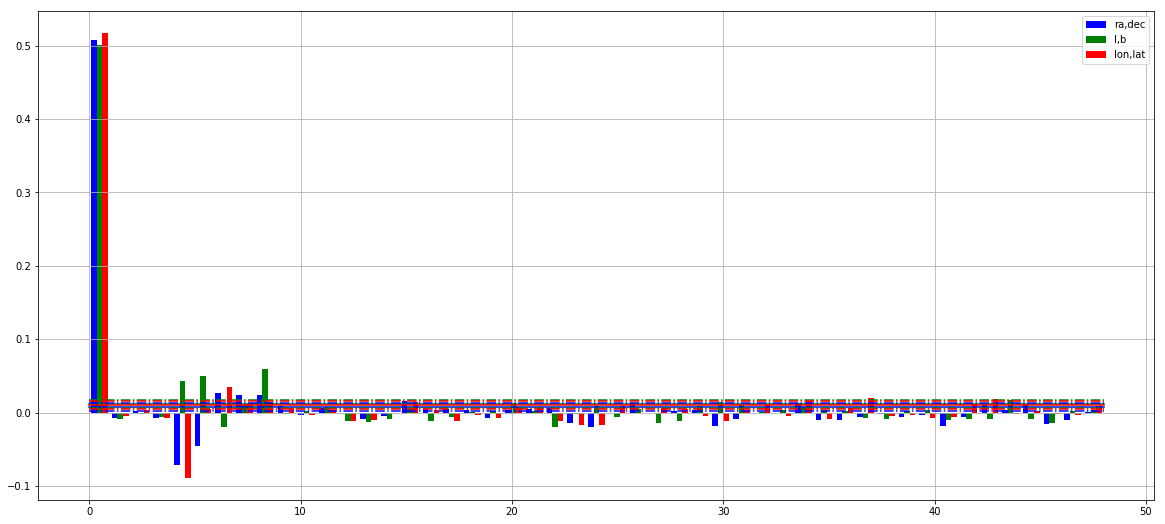

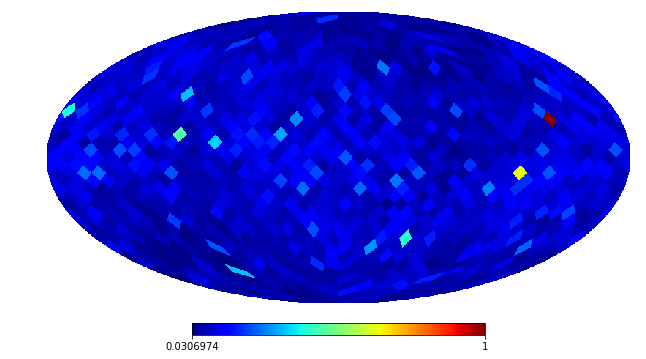

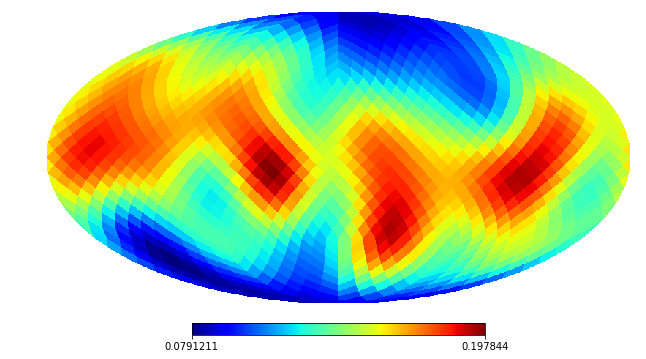

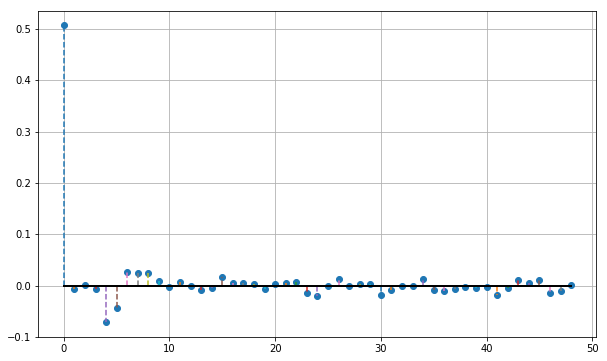

get_healpix:k=23, (l,b)
min_ns=35.0	max_ns=169.0	parallax_difference_abs LinregressResult(slope=-1.2622545774896368, intercept=0.64503961034179413, rvalue=-0.34155993947887275, pvalue=3.5985355387759551e-34, stderr=0.1003494002144769)
min_ns=35.0	max_ns=169.0	parallax_error_hip_tgas LinregressResult(slope=-1.5027457365865964, intercept=0.77481289633644845, rvalue=-0.39005932634954177, pvalue=6.8192100514739901e-45, stderr=0.10249127471130783)
min_ns=35.0	max_ns=169.0	nobs LinregressResult(slope=1.7562143017484855, intercept=0.24294434059840928, rvalue=0.33367527690837145, pvalue=1.346900653275777e-32, stderr=0.14334847758061306)


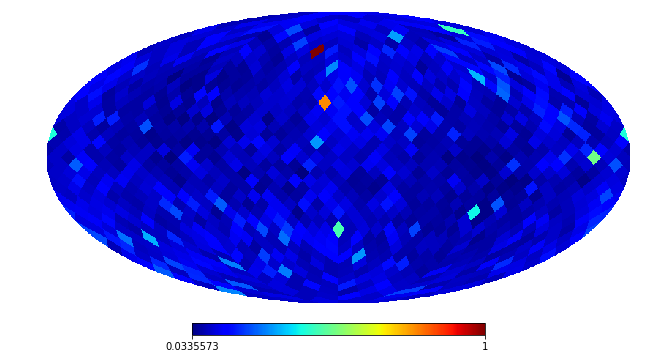

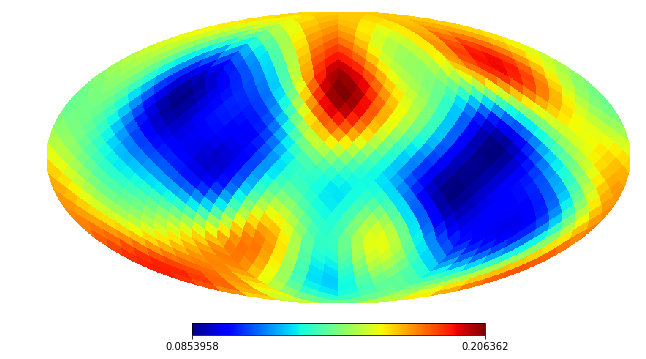

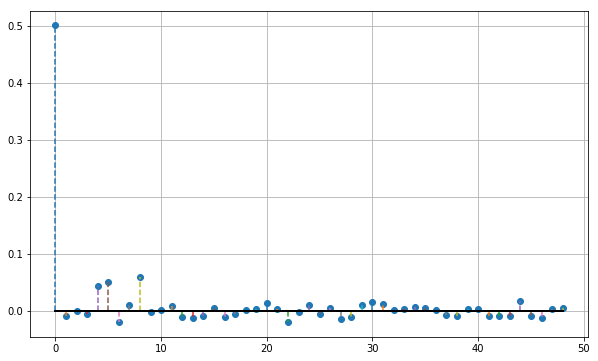

get_healpix:k=14, (ecl_lon,ecl_lat)
min_ns=35.0	max_ns=169.0	parallax_difference_abs LinregressResult(slope=2.3711915544080275, intercept=0.12082342998062162, rvalue=0.6407929063761798, pvalue=1.0572831378078563e-139, stderr=0.082076697241765903)
min_ns=35.0	max_ns=169.0	parallax_error_hip_tgas LinregressResult(slope=2.8211555727156101, intercept=0.15098420627753767, rvalue=0.7313129774416719, pvalue=2.5348153518908462e-201, stderr=0.076016257517023914)
min_ns=35.0	max_ns=169.0	nobs LinregressResult(slope=-3.0650230022543909, intercept=0.93813411185009254, rvalue=-0.58158251412336981, pvalue=1.5761989502099714e-109, stderr=0.1238639224257783)


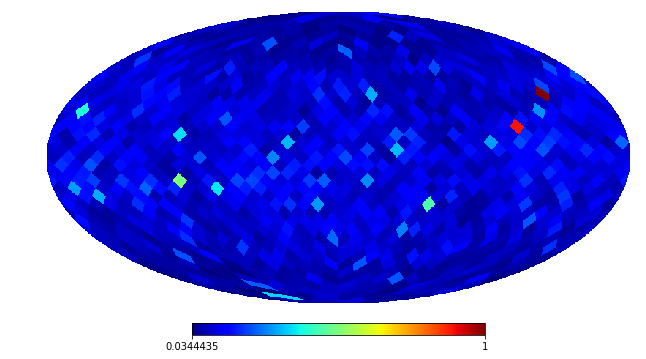

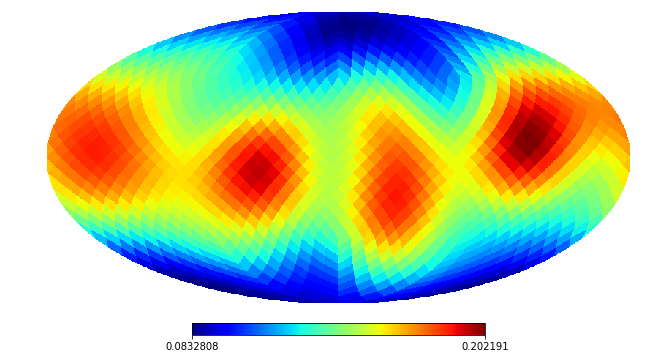

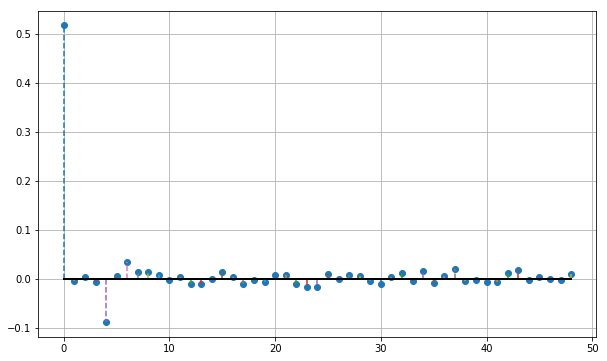

################################################################################
d:	0.0025	0.0028	0.0031
M:	0.0083	0.0121	0.0104
k:	[0, 4, 5, 6, 13, 23, 24, 30, 31, 35, 36, 41, 46, 47]	[0, 1, 3, 4, 5, 6, 8, 12, 13, 14, 16, 17, 22, 25, 27, 28, 37, 38, 41, 42, 43, 45, 46]	[0, 3, 4, 6, 12, 13, 17, 19, 22, 23, 24, 30, 35, 40]
################################################################################
id__	ra,dec	__l,b__	lon,lat	s_rd	s_lb	s_ll	
0 &0.5071 &0.5002 &0.5173 &0.0054 &0.0052 &0.0056\\
1 &-0.0067 &-0.009 &-0.0045 &0.0054 &0.0052 &0.0056\\
2 &0.0018 &-0.001 &0.0033 &0.0054 &0.0052 &0.0056\\
3 &-0.0066 &-0.005 &-0.0073 &0.0054 &0.0052 &0.0056\\
4 &-0.0708 &0.044 &-0.0881 &0.0054 &0.0052 &0.0056\\
5 &-0.0445 &0.0501 &0.0053 &0.0054 &0.0052 &0.0056\\
6 &0.0274 &-0.0193 &0.0345 &0.0054 &0.0052 &0.0056\\
7 &0.0246 &0.0107 &0.0139 &0.0054 &0.0052 &0.0056\\
8 &0.0245 &0.0593 &0.0147 &0.0054 &0.0052 &0.0056\\
9 &0.0093 &-0.0021 &0.0072 &0.0054 &0.0052 &0.0056\\
10 &-0.0027 &0.0019 &-0

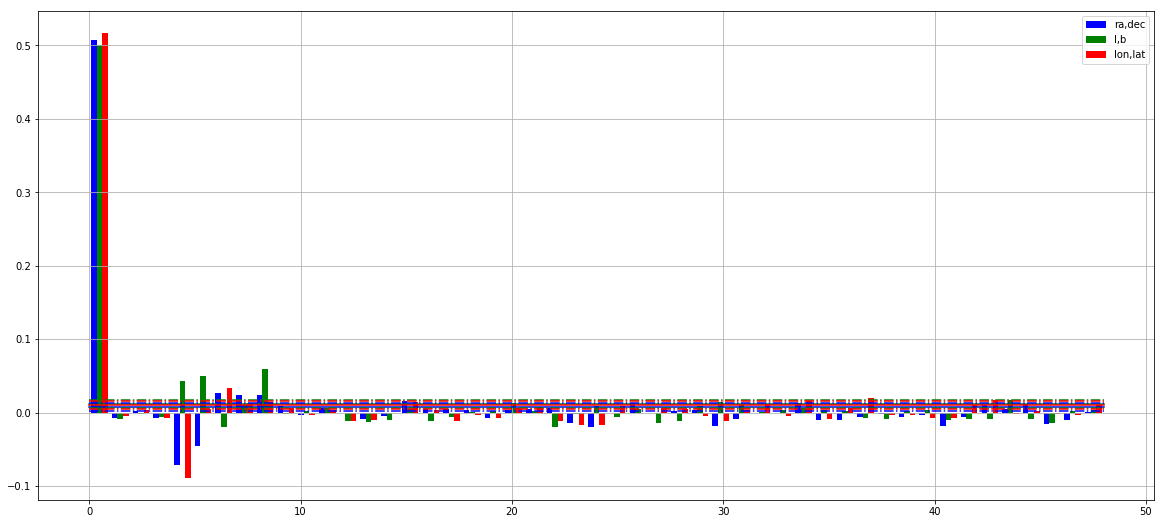

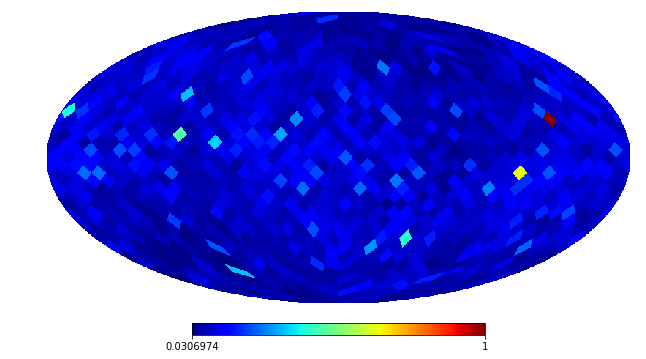

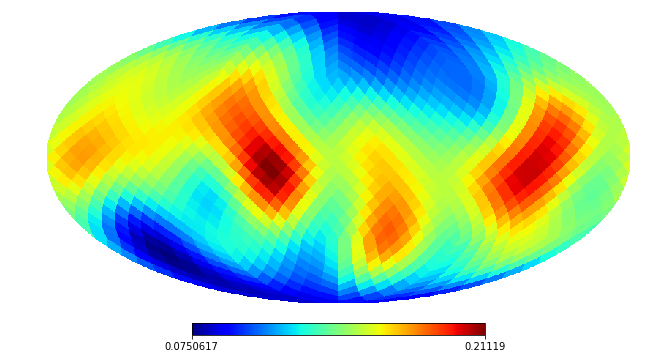

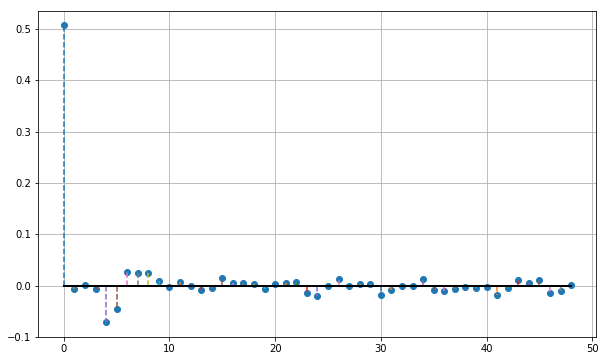

get_healpix:k=23, (l,b)
min_ns=35.0	max_ns=169.0	parallax_difference_abs LinregressResult(slope=-1.2585344125466096, intercept=0.64440697423097815, rvalue=-0.34060367754879106, pvalue=5.6152059101571447e-34, stderr=0.10037159298682255)
min_ns=35.0	max_ns=169.0	parallax_error_hip_tgas LinregressResult(slope=-1.4978420774668504, intercept=0.77399278459072141, rvalue=-0.38884404525857363, pvalue=1.3345927783954243e-44, stderr=0.10253329862739675)
min_ns=35.0	max_ns=169.0	nobs LinregressResult(slope=1.7524029630958962, intercept=0.24363210772350044, rvalue=0.33300040595230013, pvalue=1.8275792374755983e-32, stderr=0.14336354536562834)


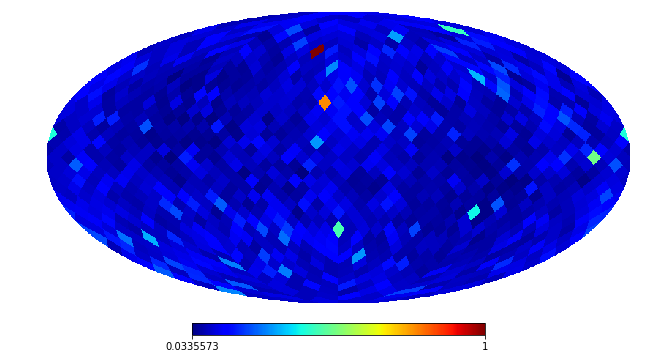

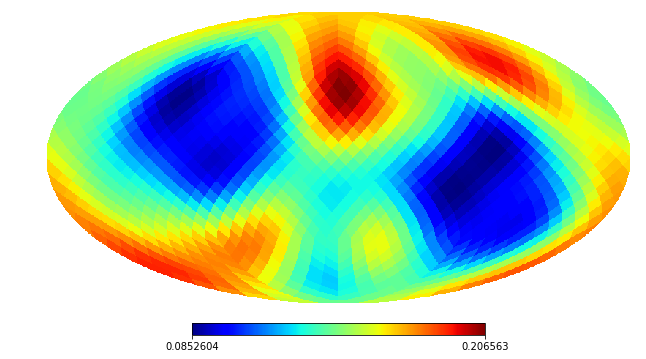

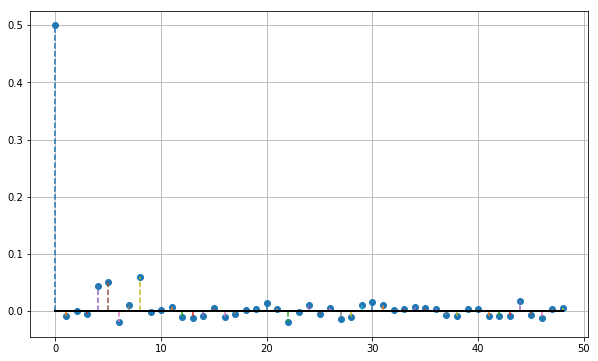

get_healpix:k=15, (ecl_lon,ecl_lat)
min_ns=35.0	max_ns=169.0	parallax_difference_abs LinregressResult(slope=2.3778440537723644, intercept=0.11996375537033899, rvalue=0.64425185149801645, pvalue=1.1285963157664315e-141, stderr=0.081555786169399139)
min_ns=35.0	max_ns=169.0	parallax_error_hip_tgas LinregressResult(slope=2.832285085109314, intercept=0.14949233119784638, rvalue=0.73609600391949082, pvalue=2.7937252789692713e-205, stderr=0.075246091822652239)
min_ns=35.0	max_ns=169.0	nobs LinregressResult(slope=-3.0625235167194385, intercept=0.93762586875463372, rvalue=-0.58261047021470125, pvalue=5.3207982049165626e-110, stderr=0.12343278575220658)


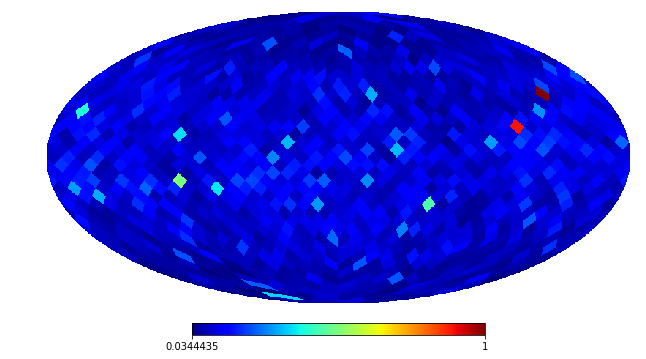

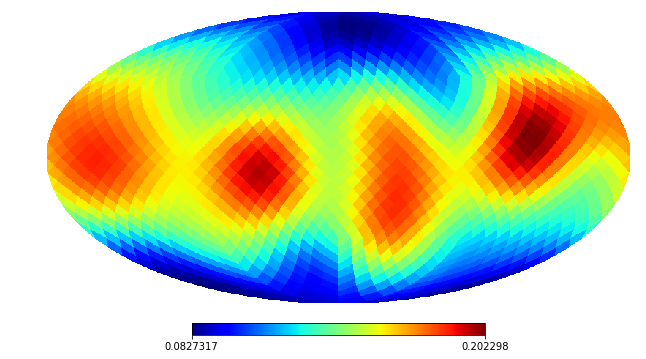

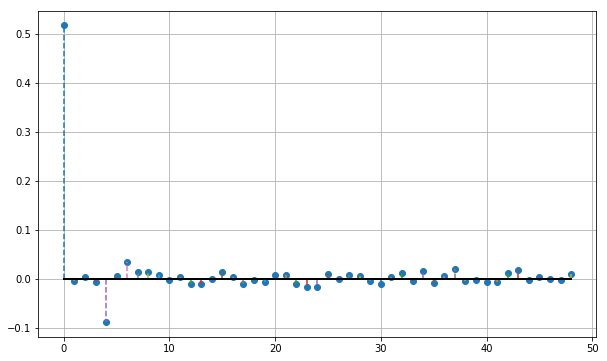

################################################################################
d:	0.0025	0.0028	0.0031
M:	0.0084	0.0121	0.0104
k:	[0, 4, 5, 6, 7, 23, 24, 30, 31, 35, 36, 41, 46, 47]	[0, 1, 3, 4, 5, 6, 8, 12, 13, 14, 16, 17, 22, 25, 27, 28, 37, 38, 41, 42, 43, 45, 46]	[0, 3, 4, 6, 12, 13, 17, 19, 22, 23, 24, 30, 35, 40, 41]
################################################################################
id__	ra,dec	__l,b__	lon,lat	s_rd	s_lb	s_ll	
0 &0.5071 &0.4999 &0.5172 &0.0054 &0.0052 &0.0056\\
1 &-0.0067 &-0.0089 &-0.0044 &0.0054 &0.0052 &0.0056\\
2 &0.0019 &-0.001 &0.0032 &0.0054 &0.0052 &0.0056\\
3 &-0.0066 &-0.0051 &-0.0074 &0.0054 &0.0052 &0.0056\\
4 &-0.0707 &0.0439 &-0.0881 &0.0054 &0.0052 &0.0056\\
5 &-0.0446 &0.0501 &0.0052 &0.0054 &0.0052 &0.0056\\
6 &0.0272 &-0.0192 &0.0344 &0.0054 &0.0052 &0.0056\\
7 &0.0247 &0.0108 &0.0139 &0.0054 &0.0052 &0.0056\\
8 &0.0245 &0.0593 &0.0148 &0.0054 &0.0052 &0.0056\\
9 &0.0094 &-0.0021 &0.0071 &0.0054 &0.0052 &0.0056\\
10 &-0.0027 &0.00

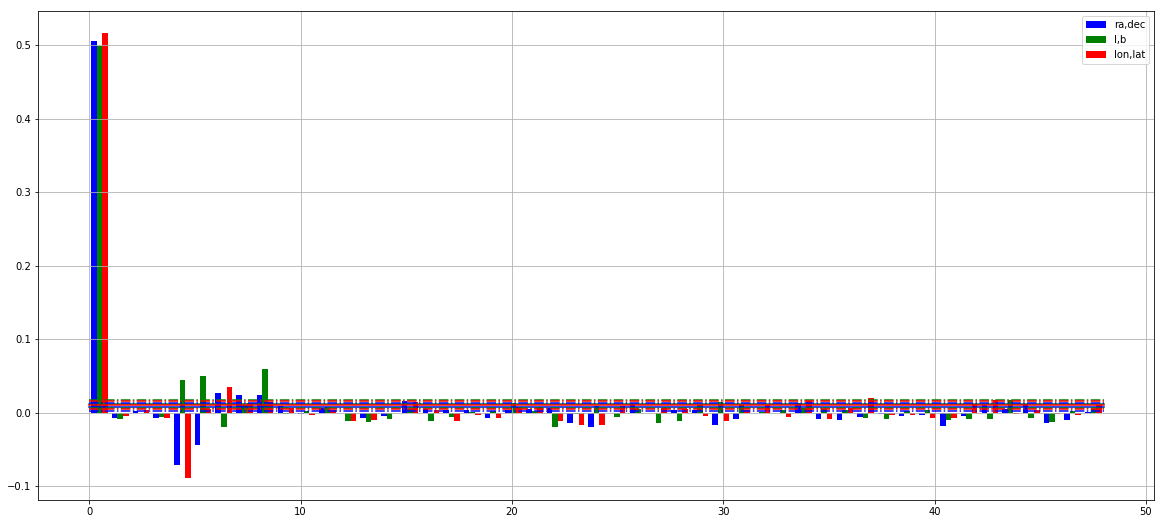

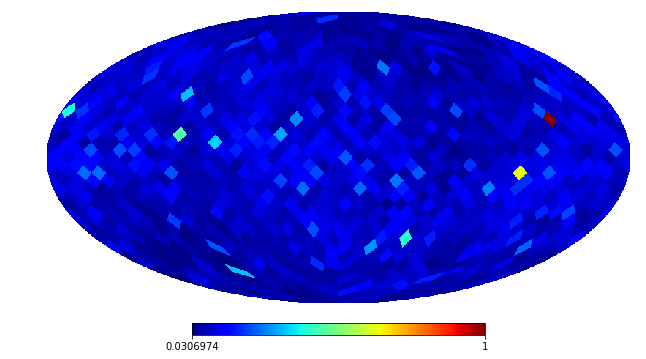

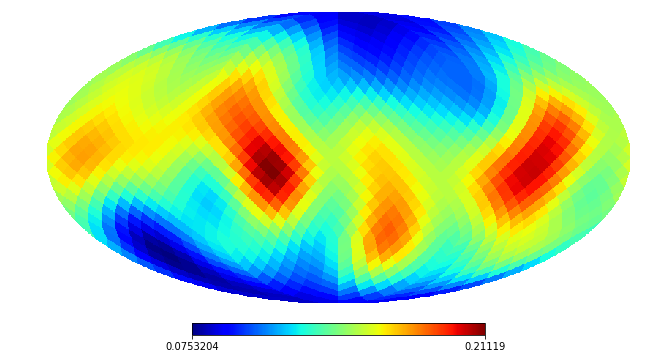

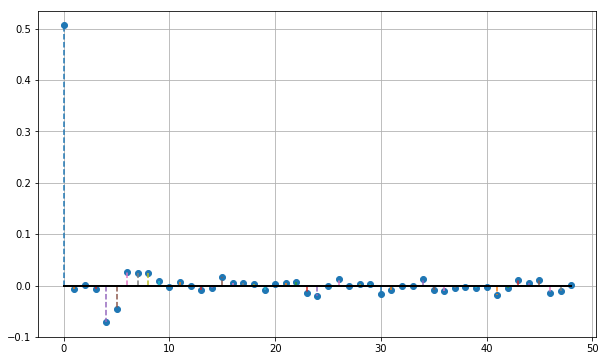

get_healpix:k=23, (l,b)
min_ns=35.0	max_ns=169.0	parallax_difference_abs LinregressResult(slope=-1.266645945947261, intercept=0.64531570550366002, rvalue=-0.34187900336534105, pvalue=3.1009815449412057e-34, stderr=0.10059211772278513)
min_ns=35.0	max_ns=169.0	parallax_error_hip_tgas LinregressResult(slope=-1.5093018804376686, intercept=0.77532863538473418, rvalue=-0.39076755106428662, pvalue=4.6049510438296652e-45, stderr=0.10271834157069748)
min_ns=35.0	max_ns=169.0	nobs LinregressResult(slope=1.7575771509357101, intercept=0.24322873196595218, rvalue=0.33308734757723485, pvalue=1.7571951534466444e-32, stderr=0.14374463168081589)


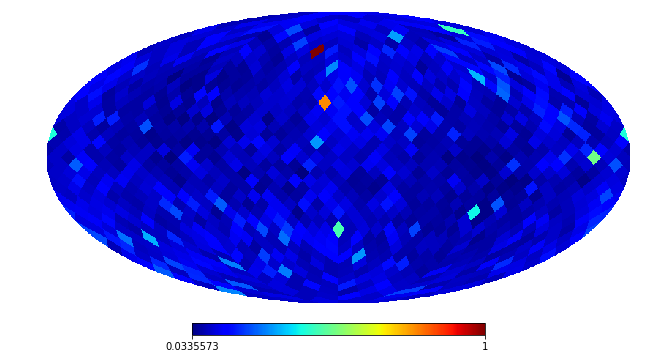

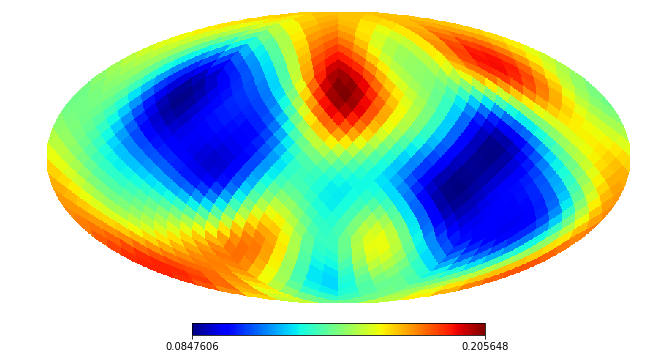

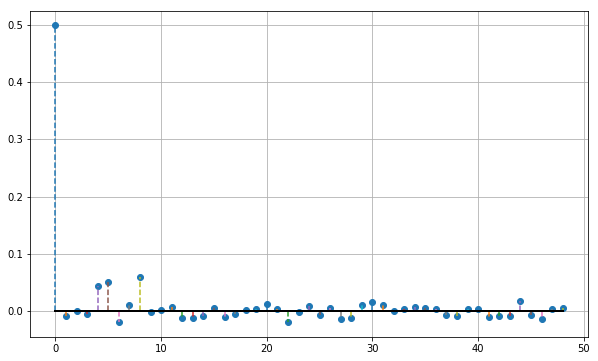

get_healpix:k=15, (ecl_lon,ecl_lat)
min_ns=35.0	max_ns=169.0	parallax_difference_abs LinregressResult(slope=2.3750122948037342, intercept=0.12058224530212608, rvalue=0.64403704780434967, pvalue=1.4987341709851956e-141, stderr=0.081505103370365373)
min_ns=35.0	max_ns=169.0	parallax_error_hip_tgas LinregressResult(slope=2.8281729899233485, intercept=0.15033681343782879, rvalue=0.73565831303109941, pvalue=6.4854883881520093e-205, stderr=0.07523438224914647)
min_ns=35.0	max_ns=169.0	nobs LinregressResult(slope=-3.0609180238429952, intercept=0.93712702389289415, rvalue=-0.5828049523095914, pvalue=4.3306932592482436e-110, stderr=0.12330574986339647)


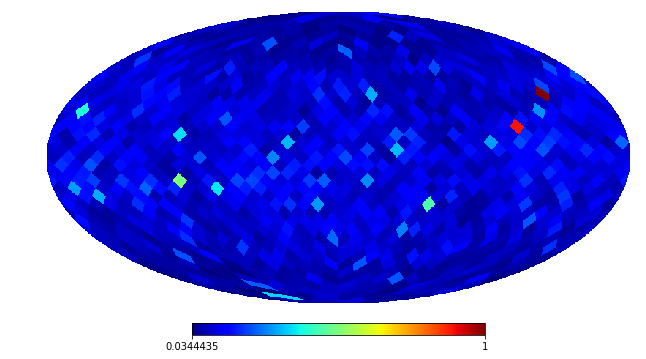

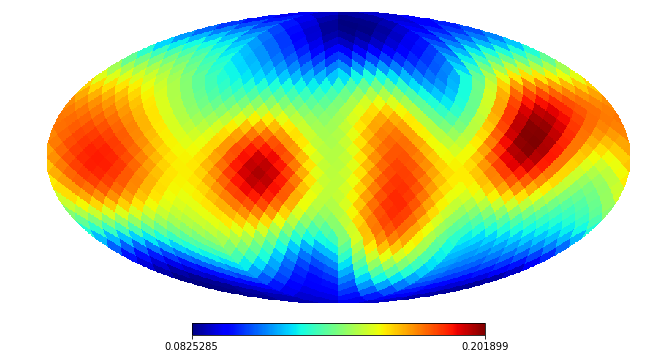

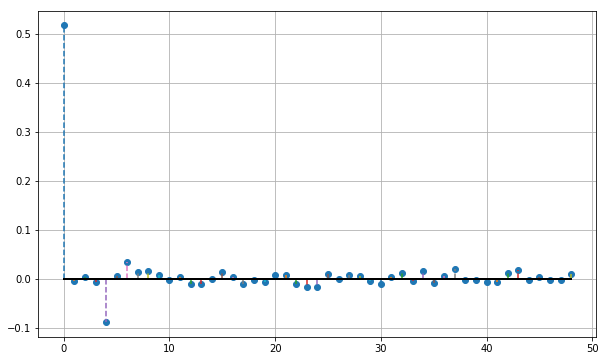

################################################################################
d:	0.0025	0.0028	0.0031
M:	0.0084	0.0121	0.0104
k:	[0, 4, 5, 6, 7, 23, 24, 30, 31, 35, 36, 41, 46, 47]	[0, 1, 3, 4, 5, 6, 8, 12, 13, 14, 16, 17, 22, 25, 27, 28, 37, 38, 41, 42, 43, 45, 46]	[0, 3, 4, 6, 12, 13, 17, 19, 22, 23, 24, 30, 35, 40, 41]
################################################################################
id__	ra,dec	__l,b__	lon,lat	s_rd	s_lb	s_ll	
0 &0.5064 &0.4993 &0.5169 &0.0054 &0.0052 &0.0056\\
1 &-0.0066 &-0.009 &-0.0046 &0.0054 &0.0052 &0.0056\\
2 &0.0019 &-0.0009 &0.0034 &0.0054 &0.0052 &0.0056\\
3 &-0.0066 &-0.0052 &-0.0075 &0.0054 &0.0052 &0.0056\\
4 &-0.0707 &0.044 &-0.0882 &0.0054 &0.0052 &0.0056\\
5 &-0.0446 &0.0501 &0.0052 &0.0054 &0.0052 &0.0056\\
6 &0.0271 &-0.0189 &0.0344 &0.0054 &0.0052 &0.0056\\
7 &0.0247 &0.0107 &0.0137 &0.0054 &0.0052 &0.0056\\
8 &0.0244 &0.0592 &0.0151 &0.0054 &0.0052 &0.0056\\
9 &0.0095 &-0.0021 &0.007 &0.0054 &0.0052 &0.0056\\
10 &-0.0022 &0.0023

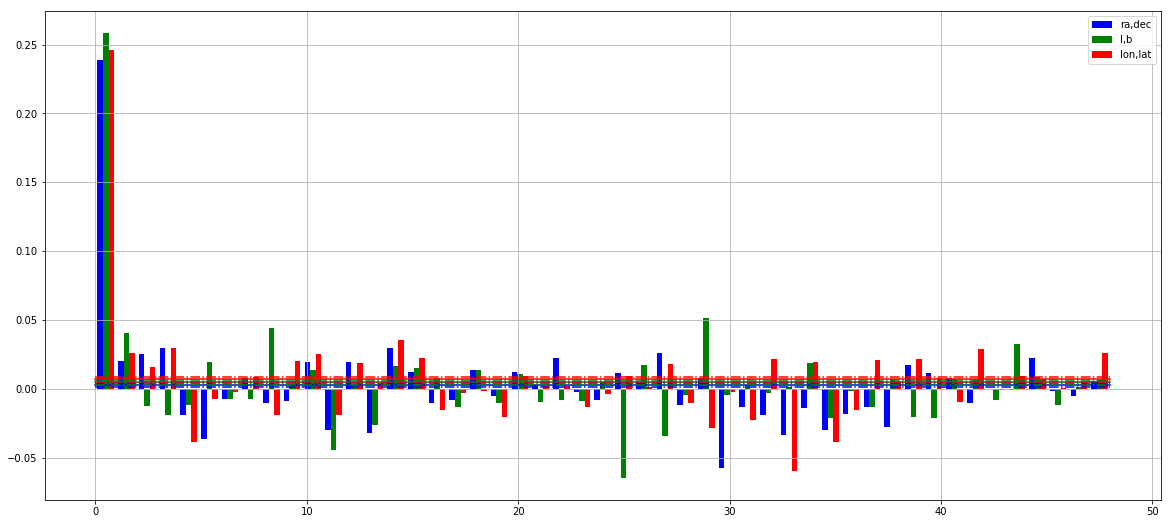

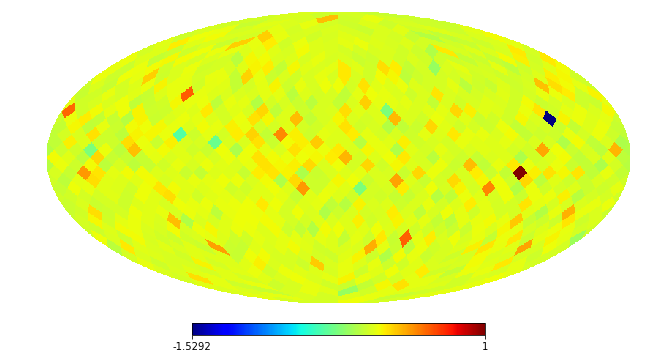

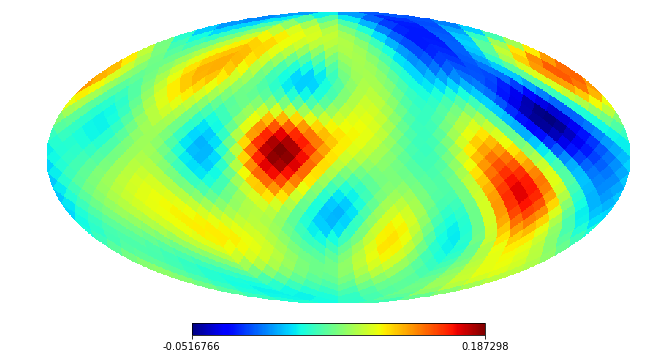

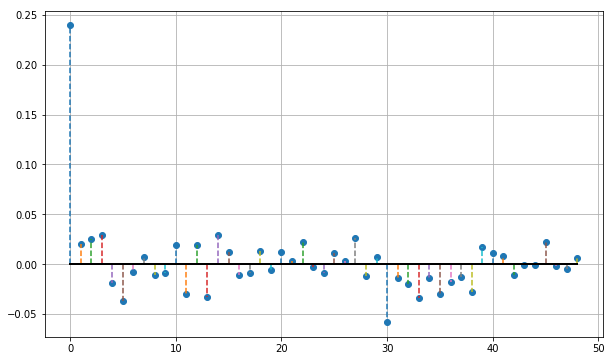

get_healpix:k=37, (l,b)
min_ns=35.0	max_ns=169.0	parallax_difference_abs LinregressResult(slope=-0.018328442574692752, intercept=0.46826818012826538, rvalue=-0.0069653818986789235, pvalue=0.80952460416940186, stderr=0.076022419200620153)
min_ns=35.0	max_ns=169.0	parallax_error_hip_tgas LinregressResult(slope=-0.083919057631179433, intercept=0.56889278133241716, rvalue=-0.030591808806585487, pvalue=0.28965682461347514, stderr=0.079217971721624286)
min_ns=35.0	max_ns=169.0	nobs LinregressResult(slope=-0.16043576183414968, intercept=0.50245788737683184, rvalue=-0.042810184259802292, pvalue=0.13830776934547848, stderr=0.10817510895849042)


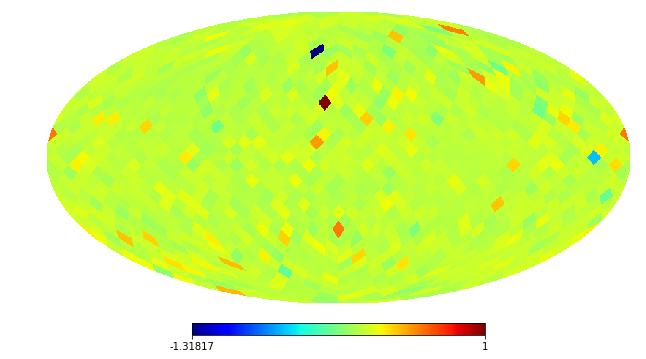

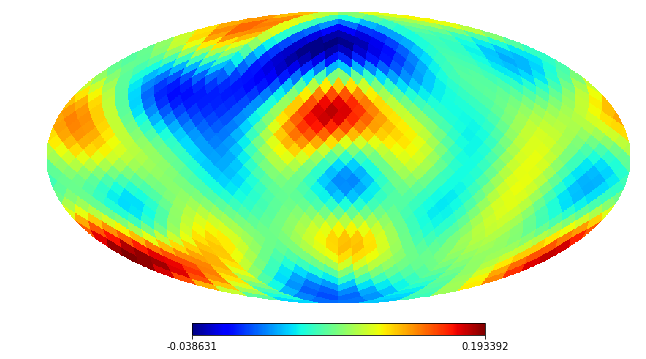

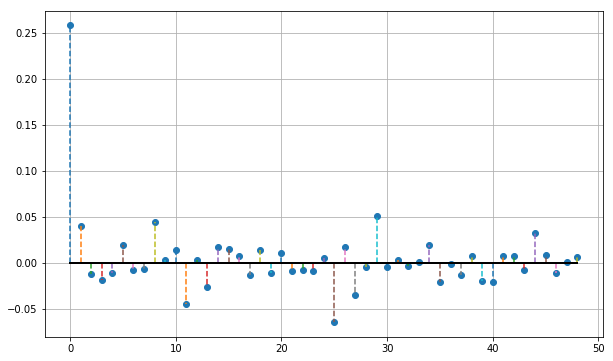

get_healpix:k=39, (ecl_lon,ecl_lat)
min_ns=35.0	max_ns=169.0	parallax_difference_abs LinregressResult(slope=0.78043814051667915, intercept=0.41268264163913126, rvalue=0.28259596041983587, pvalue=1.801931583413437e-23, stderr=0.076536917950092834)
min_ns=35.0	max_ns=169.0	parallax_error_hip_tgas LinregressResult(slope=0.87201916332082752, intercept=0.50215595624354248, rvalue=0.30288563834722665, pvalue=7.0115816259779215e-27, stderr=0.079272782465014791)
min_ns=35.0	max_ns=169.0	nobs LinregressResult(slope=-0.45624959911157836, intercept=0.52246644426509026, rvalue=-0.11599960391301288, pvalue=5.6310739884630391e-05, stderr=0.11286929972690909)


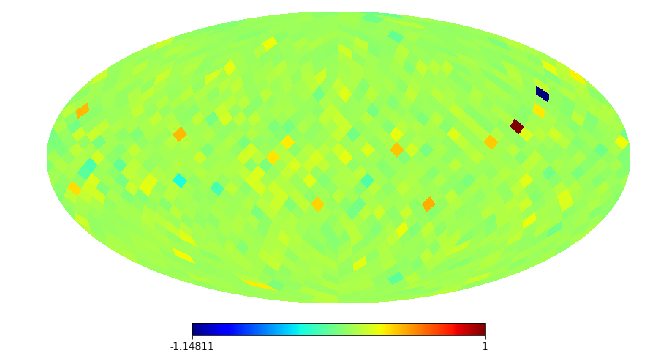

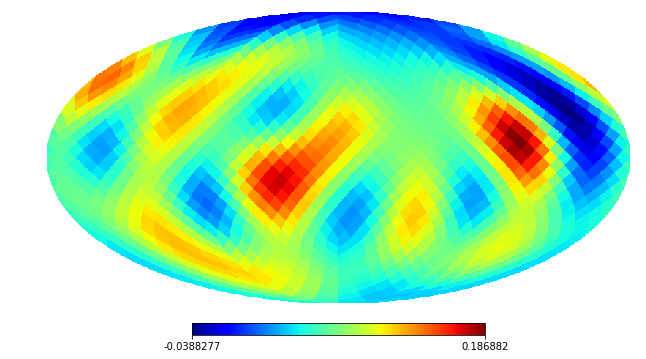

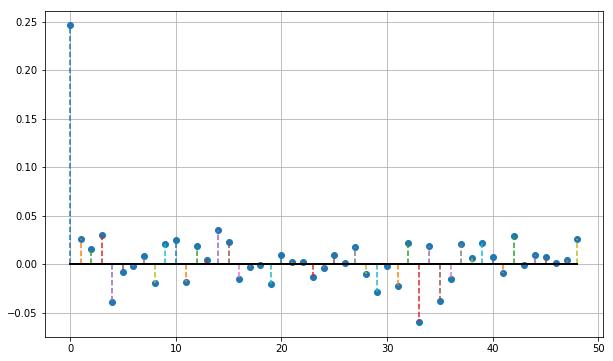

################################################################################
d:	0.0078	0.0068	0.0051
M:	0.0028	0.0047	0.0069
k:	[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 47]	[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 37, 39, 40, 43, 44, 46]	[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 41, 42, 43, 46, 48]
################################################################################
id__	ra,dec	__l,b__	lon,lat	s_rd	s_lb	s_ll	
0 &0.2391 &0.2586 &0.2463 &0.0015 &0.0018 &0.0016\\
1 &0.0201 &0.0406 &0.0261 &0.0015 &0.0018 &0.0016\\
2 &0.025 &-0.0122 &0.0161 &0.0015 &0.0018 &0.0016\\
3 &0.0295 &-0.0188 &0.0297 &0.0015 &0.0018 &0.0016\\
4 &-0.019 &-0.0116 &-0.0388 &0.0015 &0.0018 &0.0016\\
5 &-0.0361 &0.0193 &-0.0077 &

In [17]:
%%time
get_sf_gr(df_gh_srz[df_gh_srz['parallax_difference_abs_qrt']>3*df_gh_srz['parallax_error_hip_tgas']],cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs_qrt')
get_sf_gr(df_gh_srz[df_gh_srz['parallax_difference_abs_qrt']>3*df_gh_srz['parallax_error_hip_tgas']],cintro_m0=True,arg_m0='',arg_y0='parallax_difference_abs_qrt')
get_sf_gr(df_gh_srz[df_gh_srz['parallax_difference_abs_qrt']>3*df_gh_srz['parallax_error_hip_tgas']],cintro_m0=True,arg_m0='parallax_difference_abs',arg_y0='parallax_difference_abs_qrt')
get_sf_gr(df_gh_srz[df_gh_srz['parallax_difference_abs_qrt']>3*df_gh_srz['parallax_error_hip_tgas']],cintro_m0=True,arg_m0='parallax_difference_abs',arg_y0='parallax_difference_qrt')


#get_sf_gr(cintro_m0=False,arg_m0='',arg_y0='parallax_error_hip_tgas')
#get_sf_gr(cintro_m0=True,arg_m0='',arg_y0='parallax_error_hip_tgas')
#get_sf_gr(cintro_m0=True,arg_m0='parallax_error_hip_tgas',arg_y0='parallax_error_hip_tgas')

In [18]:
#df_gh_srz[df_gh_srz['parallax_difference_abs'] > 3*df_gh_srz['parallax_error_hip_tgas']]

In [19]:
def get_Y_err(arg_l = 'l', arg_b = 'b', arg_summ = 'parallax_difference_abs', err = 'parallax_error_hip_tgas'):
    Ny_ = np.zeros(nside_a_n)
    Y_ = np.zeros(nside_a_n)
    srezx = 3 * df_gh_srz[err] < df_gh_srz[arg_summ]
    for i in ii(df_gh_srz[srezx][arg_b],df_gh_srz[srezx][arg_l]):
        Ny_[i] += 1
    print('min_ns={}\tmax_ns={}\t'.format(min(Ny_),max(Ny_)),end='') #nmin_n_in_sector max_n_in_sector
    for i,rm in zip(ii(df_gh_srz[srezx][arg_b],df_gh_srz[srezx][arg_l]),df_gh_srz[srezx][arg_summ]):
        Y_[i] += rm
    return [Y_[i] / Ny_[i] if (Ny_[i] > 0) else 0 for i in np.arange(nside_a_n)] 

In [20]:
NSIDE = 10
sfet_f_n = 48
nside_a_n = NSIDE**2 * 12
n_array_nside = np.arange(hp.nside2npix(NSIDE))

Am0 ,Y0= get_a(df_gh_srz,'ecl_lon','ecl_lat',False,'parallax_difference_abs','parallax_difference_abs')
X0 = np.linalg.lstsq(Am0,get_Y_err('ecl_lon', 'ecl_lat','parallax_difference_abs','parallax_error_hip_tgas'))
#df_gh_srz[df_gh_srz['parallax_difference_abs'] > 3*df_gh_srz['parallax_error_hip_tgas']]

min_ns=35.0	max_ns=169.0	
min_ns=0.0	max_ns=7.0	

d=13.143075258983071,	M=0.20134279705931157,	D=2.777887961709053
j =	0	11.3003
min_ns=35.0	max_ns=169.0	parallax_difference_abs LinregressResult(slope=0.080000000000000002, intercept=0.21190973589827161, rvalue=3.3514508126706087e-16, pvalue=0.99999999999999067, stderr=6896499802084.7139)
min_ns=35.0	max_ns=169.0	parallax_error_hip_tgas LinregressResult(slope=0.23666666666666669, intercept=-0.19166766997250306, rvalue=9.5105393133690055e-16, pvalue=0.9999999999999738, stderr=7189580319063.4365)
min_ns=35.0	max_ns=169.0	nobs LinregressResult(slope=-0.085833333333333345, intercept=0.76436900900312654, rvalue=-2.524790735739104e-16, pvalue=0.99999999999999301, stderr=9822050928352.6309)


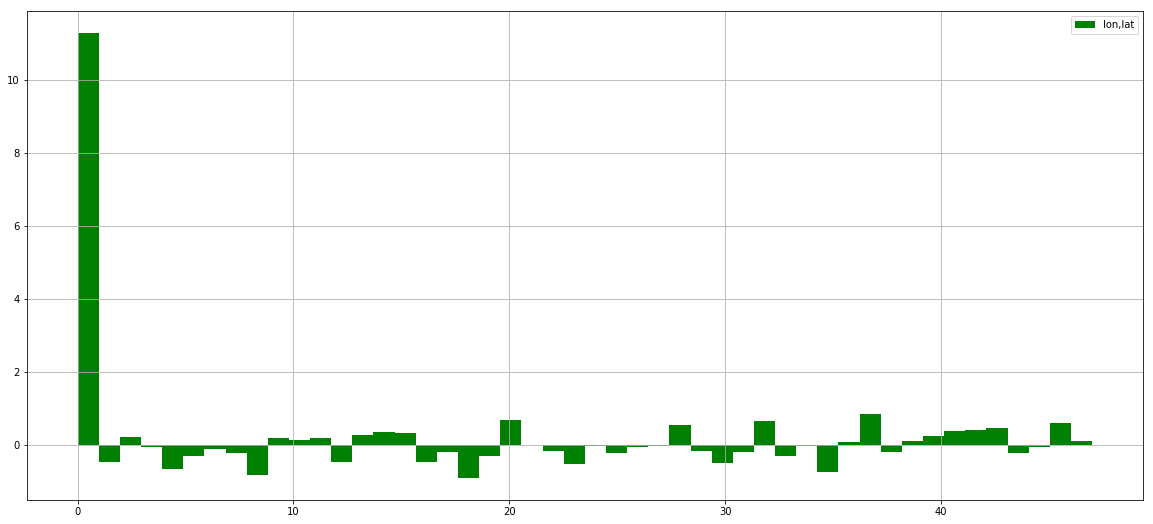

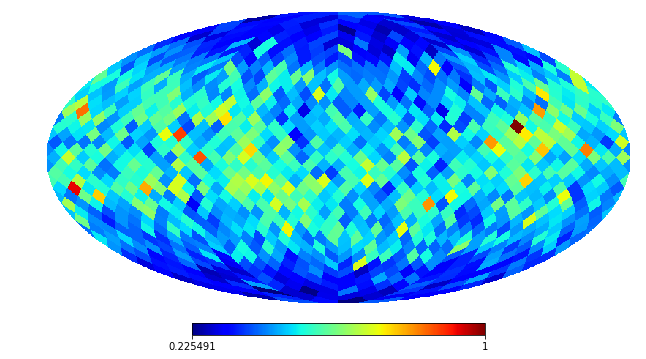

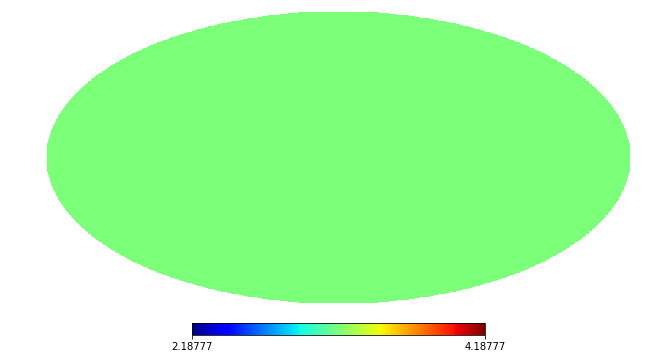

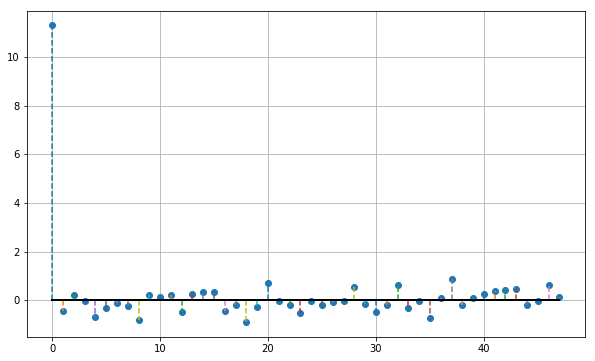

In [21]:
d0,M0,D0,k0 = statis(X0)
    
plt.figure(figsize=(20,9))
labels = ['lon,lat']
xx = [ i for i in np.arange(sfet_f_n)]
plt.hist([xx], sfet_f_n, weights = [X0[0]],histtype='bar', color=['g'], label=labels)
plt.legend(prop={'size': 10})
plt.grid()
    
if (len(k0)>1):
    print('get_healpix:k={}, (ra,dec)'.format(len(k0)))
get_healpix_sf(X0,Y0,k0)
   

min_ns=35.0	max_ns=169.0	

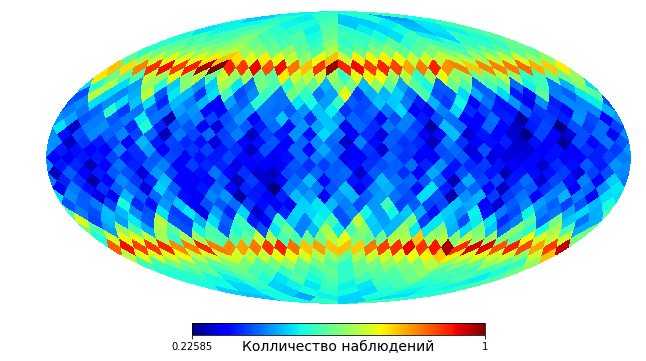

In [22]:
NSIDE = 10
sfet_f_n = 100
nside_a_n = NSIDE**2 * 12
n_array_nside = np.arange(hp.nside2npix(NSIDE))

hp.mollview(np.array(get_Y(df_gh_srz,'ecl_lon', 'ecl_lat','nobs')),title = '',unit='Колличество наблюдений',xsize = 1800,cmap='jet')

In [23]:
#parallax_difference_abs,parallax_error_hip_tgas
a = np.array(get_Y(df_gh_srz,
                   arg_l = 'ecl_lon', arg_b = 'ecl_lat', arg_summ = 'parallax_error_hip_tgas'))
b = np.array(get_Y(df_gh_srz,'ecl_lon', 'ecl_lat','nobs'))

#a = [1,2,3]
#b = [2,5,4]
from scipy.stats import linregress
linregress(df_gh_srz['nobs'],df_gh_srz['parallax_error_hip_tgas'] )

min_ns=35.0	max_ns=169.0	min_ns=35.0	max_ns=169.0	

LinregressResult(slope=-0.0022978998012539941, intercept=1.3997582209596087, rvalue=-0.12199052869501818, pvalue=2.5132627334796097e-296, stderr=6.2223006190737624e-05)

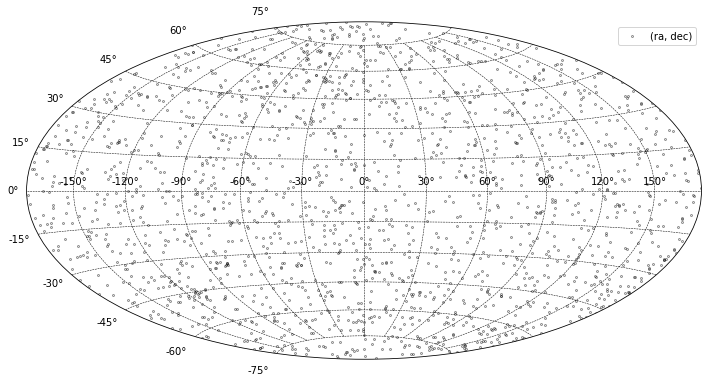

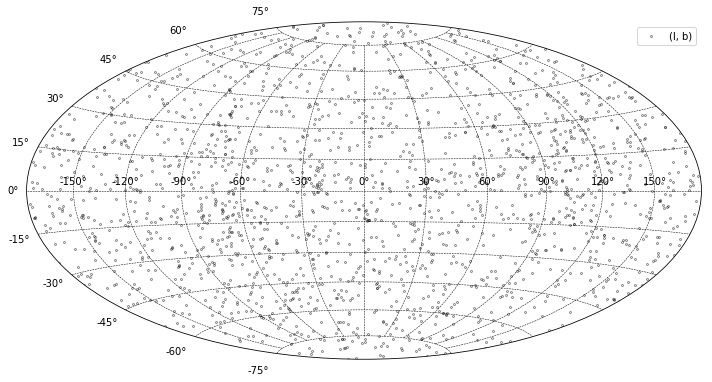

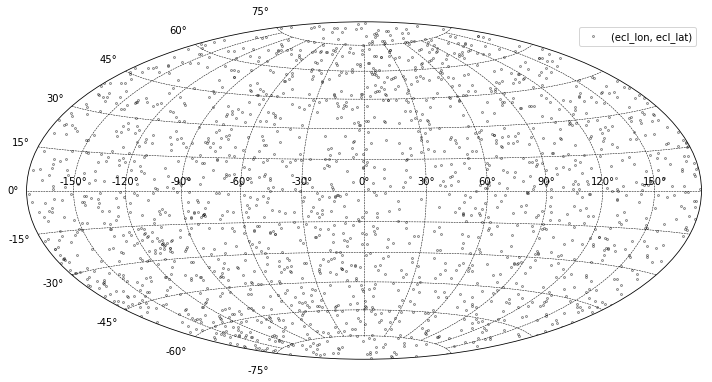

CPU times: user 980 ms, sys: 12 ms, total: 992 ms
Wall time: 984 ms


In [24]:
%%time

plt.figure(figsize=(10,6))
#print('{}: [/] Begin plot_hammer paralax.'.format(times()))
def hammer(df0,x,y):
#    print('{}: [/] Begin plot_hammer paralax {}, {}.'.format(times(),x,y))
    plt.figure(figsize=(10,6))
    plt.clf()
    ax = plt.subplot(111, projection = 'hammer')
    ax.scatter(
        df0[x]*np.pi/180-np.pi,
        df0[y]*np.pi/180-np.pi/2,
        s = .15,
        marker='o',
        color = 'k',
        linewidths=2.01,
        label = '({}, {})'.format(x,y)
    )
    #ax.contour(X,Y,Z,10,colors='k')
    #ax.scatter([0],[np.pi/2],color = 'g')#,51.1,marker='o',color = 'r',linewidths=0.01)
    #''''o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X''''
    plt.legend(loc='best');
    plt.grid(color='k', linestyle='--', linewidth=0.5)
    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    plt.tight_layout()
    #plt.savefig('hammer_'+str(x)+'_'+str(y)+'.png',dpi=1000,format='png')
#    print('{}: [/] End plot_hammer paralax.'.format(times()))
    plt.show()
    
#hammer(df_gh_srz,'ra','dec')
#hammer(df_gh_srz,'l','b')
#hammer(df_gh_srz,'ecl_lon','ecl_lat')
hammer(df_gh_srz[df_gh_srz['parallax_difference_abs']>3*df_gh_srz['parallax_error_hip_tgas']],'ra','dec')
hammer(df_gh_srz[df_gh_srz['parallax_difference_abs']>3*df_gh_srz['parallax_error_hip_tgas']],'l','b')
hammer(df_gh_srz[df_gh_srz['parallax_difference_abs']>3*df_gh_srz['parallax_error_hip_tgas']],'ecl_lon','ecl_lat')

